https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html

In [1]:
cd ..

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training


In [2]:
pwd

'C:\\Users\\KonuTech\\PycharmProjects\\mlops-zoomcamp-training'

In [3]:
import os
import json
import pickle
import pandas as pd

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [76]:
import xgboost as xgb

In [77]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [6]:
import mlflow

In [78]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [7]:
# mlflow.set_tracking_uri('sqlite:///mlflow.db')
# mlflow.set_experiment('duration-prediction-homework')

2023/05/17 09:18:35 INFO mlflow.tracking.fluent: Experiment with name 'duration-prediction-homework' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/KonuTech/PycharmProjects/mlops-zoomcamp-training/mlruns/1', creation_time=1684307915748, experiment_id='1', last_update_time=1684307915748, lifecycle_stage='active', name='duration-prediction-homework', tags={}>

In [8]:
from IPython.display import display, HTML
import warnings

In [9]:
display(HTML("<style>.container { width:100% !important; }</style>"))
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format

## Module 1.

In [10]:
CONFIG = 'config.json'

In [11]:
TRAIN = 'yellow_tripdata_2022-01.parquet'

In [12]:
TEST = 'yellow_tripdata_2022-02.parquet'

In [13]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH_TRAIN = os.path.join(os.getcwd(), 'INPUTS', TRAIN)

# Print the file path
print(FILE_PATH_TRAIN)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\INPUTS\yellow_tripdata_2022-01.parquet


In [14]:
# Get the absolute path of the file within the INPUTS directory
FILE_PATH_TEST = os.path.join(os.getcwd(), 'INPUTS', TEST)

# Print the file path
print(FILE_PATH_TEST)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\INPUTS\yellow_tripdata_2022-02.parquet


In [15]:
# Get the absolute path of the config within the CONFIGS directory
CONFIG_PATH = os.path.join(os.getcwd(), 'CONFIGS', CONFIG)

# Print the fileconfig_pathpath
print(CONFIG_PATH)

C:\Users\KonuTech\PycharmProjects\mlops-zoomcamp-training\CONFIGS\config.json


In [16]:
with open(CONFIG_PATH, encoding='utf-8') as f:
    CONFIG = json.load(f)

In [17]:
df = pd.read_parquet(FILE_PATH_TRAIN)

In [18]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00,3.80,1.00,N,142,236,1,14.50,3.00,0.50,3.65,0.00,0.30,21.95,2.50,0.00
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00,2.10,1.00,N,236,42,1,8.00,0.50,0.50,4.00,0.00,0.30,13.30,0.00,0.00
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00,0.97,1.00,N,166,166,1,7.50,0.50,0.50,1.76,0.00,0.30,10.56,0.00,0.00
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00,1.09,1.00,N,114,68,2,8.00,0.50,0.50,0.00,0.00,0.30,11.80,2.50,0.00
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00,4.30,1.00,N,68,163,1,23.50,0.50,0.50,3.00,0.00,0.30,30.30,2.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.00,0.50,2.39,0.00,0.30,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.00,0.50,4.35,0.00,0.30,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.00,0.50,2.00,0.00,0.30,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.00,0.50,0.00,0.00,0.30,15.70,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [20]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [21]:
duration_std = df['duration'].std()

print("Standard deviation of trip duration:", duration_std)

Standard deviation of trip duration: 46.44530513776802


In [22]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [23]:
df.loc[((df.duration >= 1) & (df.duration <= 60)), 'duration'].mean()

12.671278846471523

In [24]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00,3.80,1.00,N,142,236,1,14.50,3.00,0.50,3.65,0.00,0.30,21.95,2.50,0.00,17.82
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00,2.10,1.00,N,236,42,1,8.00,0.50,0.50,4.00,0.00,0.30,13.30,0.00,0.00,8.40
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00,0.97,1.00,N,166,166,1,7.50,0.50,0.50,1.76,0.00,0.30,10.56,0.00,0.00,8.97
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00,1.09,1.00,N,114,68,2,8.00,0.50,0.50,0.00,0.00,0.30,11.80,2.50,0.00,10.03
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00,4.30,1.00,N,68,163,1,23.50,0.50,0.50,3.00,0.00,0.30,30.30,2.50,0.00,37.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.00,0.50,2.39,0.00,0.30,13.69,NaN,NaN,5.97
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.00,0.50,4.35,0.00,0.30,24.45,NaN,NaN,10.65
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.00,0.50,2.00,0.00,0.30,16.52,NaN,NaN,11.00
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.00,0.50,0.00,0.00,0.30,15.70,NaN,NaN,12.05


In [25]:
2421440 / 2463931 

0.9827547930522406

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421440 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [27]:
duration_std = df['duration'].std()

print("Standard deviation of trip duration:", duration_std)

Standard deviation of trip duration: 8.99928164030397


In [28]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [29]:
train_dicts

[{'PULocationID': '142', 'DOLocationID': '236', 'trip_distance': 3.8},
 {'PULocationID': '236', 'DOLocationID': '42', 'trip_distance': 2.1},
 {'PULocationID': '166', 'DOLocationID': '166', 'trip_distance': 0.97},
 {'PULocationID': '114', 'DOLocationID': '68', 'trip_distance': 1.09},
 {'PULocationID': '68', 'DOLocationID': '163', 'trip_distance': 4.3},
 {'PULocationID': '138', 'DOLocationID': '161', 'trip_distance': 10.3},
 {'PULocationID': '233', 'DOLocationID': '87', 'trip_distance': 5.07},
 {'PULocationID': '238', 'DOLocationID': '152', 'trip_distance': 2.02},
 {'PULocationID': '166', 'DOLocationID': '236', 'trip_distance': 2.71},
 {'PULocationID': '236', 'DOLocationID': '141', 'trip_distance': 0.78},
 {'PULocationID': '141', 'DOLocationID': '229', 'trip_distance': 1.91},
 {'PULocationID': '114', 'DOLocationID': '90', 'trip_distance': 0.82},
 {'PULocationID': '234', 'DOLocationID': '113', 'trip_distance': 0.73},
 {'PULocationID': '246', 'DOLocationID': '79', 'trip_distance': 2.16},
 

In [30]:
dv = DictVectorizer()

In [31]:
X_train = dv.fit_transform(train_dicts)

In [32]:
X_train

<2421440x516 sparse matrix of type '<class 'numpy.float64'>'
	with 7264320 stored elements in Compressed Sparse Row format>

In [33]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=105',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',

In [34]:
len(dv.feature_names_)

516

In [35]:
target = 'duration'
y_train = df[target].values

In [36]:
y_train

array([17.81666667,  8.4       ,  8.96666667, ..., 11.        ,
       12.05      , 27.        ])

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_train)

In [39]:
mean_squared_error(y_train, y_pred, squared=False)

7.001496179429168

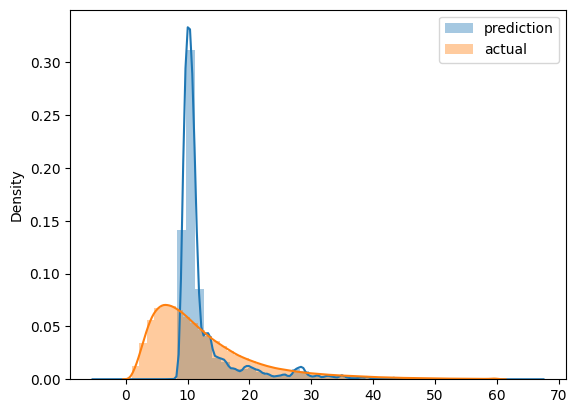

In [40]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [41]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [42]:
df_train = read_dataframe(FILE_PATH_TRAIN)
df_val = read_dataframe(FILE_PATH_TEST)

In [43]:
len(df_train), len(df_val)

(2421440, 2918187)

##### preprocessing

In [44]:
# df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
# df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421440 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [46]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918187 entries, 0 to 2979430
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [47]:
df_val['PULocationID'].unique()

array(['138', '239', '140', '48', '142', '238', '132', '143', '234',
       '233', '186', '79', '249', '107', '164', '151', '263', '229', '68',
       '230', '237', '100', '170', '144', '162', '148', '137', '141',
       '224', '161', '90', '7', '163', '43', '211', '114', '74', '113',
       '125', '244', '50', '231', '87', '264', '41', '17', '246', '75',
       '42', '70', '260', '129', '40', '158', '236', '181', '88', '166',
       '4', '24', '116', '226', '262', '65', '232', '173', '152', '45',
       '256', '13', '209', '225', '261', '168', '190', '265', '216',
       '134', '55', '135', '14', '39', '212', '235', '191', '38', '61',
       '243', '10', '242', '210', '248', '51', '112', '195', '11', '37',
       '146', '69', '53', '127', '218', '182', '155', '19', '33', '145',
       '179', '215', '197', '247', '223', '77', '177', '66', '157', '9',
       '139', '193', '102', '21', '205', '63', '213', '254', '131', '91',
       '95', '241', '189', '97', '159', '200', '78', '119', '13

In [48]:
len(df_val['PULocationID'].unique())

254

In [49]:
len(df_val['DOLocationID'].unique())

260

In [50]:
len(df_val['PULocationID'].unique()) + len(df_val['DOLocationID'].unique())

514

In [51]:
dv = DictVectorizer()

In [52]:
dv

DictVectorizer()

In [53]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts

[{'PULocationID': '142', 'DOLocationID': '236', 'trip_distance': 3.8},
 {'PULocationID': '236', 'DOLocationID': '42', 'trip_distance': 2.1},
 {'PULocationID': '166', 'DOLocationID': '166', 'trip_distance': 0.97},
 {'PULocationID': '114', 'DOLocationID': '68', 'trip_distance': 1.09},
 {'PULocationID': '68', 'DOLocationID': '163', 'trip_distance': 4.3},
 {'PULocationID': '138', 'DOLocationID': '161', 'trip_distance': 10.3},
 {'PULocationID': '233', 'DOLocationID': '87', 'trip_distance': 5.07},
 {'PULocationID': '238', 'DOLocationID': '152', 'trip_distance': 2.02},
 {'PULocationID': '166', 'DOLocationID': '236', 'trip_distance': 2.71},
 {'PULocationID': '236', 'DOLocationID': '141', 'trip_distance': 0.78},
 {'PULocationID': '141', 'DOLocationID': '229', 'trip_distance': 1.91},
 {'PULocationID': '114', 'DOLocationID': '90', 'trip_distance': 0.82},
 {'PULocationID': '234', 'DOLocationID': '113', 'trip_distance': 0.73},
 {'PULocationID': '246', 'DOLocationID': '79', 'trip_distance': 2.16},
 

In [54]:
len(train_dicts)

2421440

In [55]:
len(train_dicts[0])

3

In [56]:
X_train = dv.fit_transform(train_dicts)

before: (2421440, 20667)

In [57]:
X_train.shape

(2421440, 516)

In [58]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [59]:
len(val_dicts)

2918187

In [60]:
X_val = dv.transform(val_dicts)

In [61]:
X_val.shape

(2918187, 516)

In [62]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [63]:
y_train.shape, y_val.shape

((2421440,), (2918187,))

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(X_val)

In [66]:
mean_squared_error(y_val, y_pred, squared=False)

7.795498346156581

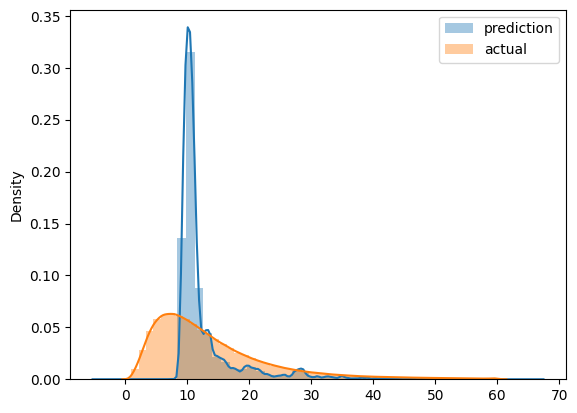

In [67]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

In [68]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [69]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

Lasso(alpha=0.01)

In [70]:
y_pred = lr.predict(X_val)

In [71]:
mean_squared_error(y_val, y_pred, squared=False)

8.115993320463872

## Module 2.

In [ ]:
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('duration-prediction-homework')

In [75]:
with mlflow.start_run():

    mlflow.set_tag('developer', 'Konrad')
    mlflow.log_param('train-data-path', 'yellow_tripdata_2022-01.parquet')
    mlflow.log_param('valid-data-path', 'yellow_tripdata_2022-02.parquet')
    
    alpha = 0.1
    mlflow.log_param('alpha', alpha)
    
    lr = Lasso(alpha)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric('rmse', rmse)
    

In [79]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [80]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [81]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0), # exp(-3), exp(0) -> [0.05, 1]
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

In [82]:
best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

[09:42:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:14.83592                                                                                                                                        
[1]	validation-rmse:13.44933                                                                                                                                        
[2]	validation-rmse:12.24004                                                                                                                                        
[3]	validation-rmse:11.18784                                                                                                                                        
[4]	validation-rmse:10.27600                                                                                 

[48]	validation-rmse:4.97134                                                                                                                                        
[49]	validation-rmse:4.97040                                                                                                                                        
[50]	validation-rmse:4.96967                                                                                                                                        
[51]	validation-rmse:4.96919                                                                                                                                        
[52]	validation-rmse:4.96851                                                                                                                                        
[53]	validation-rmse:4.96802                                                                                                                                        
[54]	valid

[97]	validation-rmse:4.97564                                                                                                                                        
[98]	validation-rmse:4.97600                                                                                                                                        
[99]	validation-rmse:4.97619                                                                                                                                        
[100]	validation-rmse:4.97674                                                                                                                                       
[101]	validation-rmse:4.97702                                                                                                                                       
[102]	validation-rmse:4.97742                                                                                                                                       
[103]	vali

[27]	validation-rmse:5.20251                                                                                                                                        
[28]	validation-rmse:5.16787                                                                                                                                        
[29]	validation-rmse:5.13783                                                                                                                                        
[30]	validation-rmse:5.11126                                                                                                                                        
[31]	validation-rmse:5.08785                                                                                                                                        
[32]	validation-rmse:5.06720                                                                                                                                        
[33]	valid

[76]	validation-rmse:4.90338                                                                                                                                        
[77]	validation-rmse:4.90328                                                                                                                                        
[78]	validation-rmse:4.90327                                                                                                                                        
[79]	validation-rmse:4.90352                                                                                                                                        
[80]	validation-rmse:4.90361                                                                                                                                        
[81]	validation-rmse:4.90357                                                                                                                                        
[82]	valid

[125]	validation-rmse:4.91220                                                                                                                                       
[126]	validation-rmse:4.91242                                                                                                                                       
[127]	validation-rmse:4.91260                                                                                                                                       
[128]	validation-rmse:4.91295                                                                                                                                       
[10:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:15.33213                                                                                 

[44]	validation-rmse:4.96607                                                                                                                                        
[45]	validation-rmse:4.95644                                                                                                                                        
[46]	validation-rmse:4.94764                                                                                                                                        
[47]	validation-rmse:4.93977                                                                                                                                        
[48]	validation-rmse:4.93245                                                                                                                                        
[49]	validation-rmse:4.92579                                                                                                                                        
[50]	valid

[93]	validation-rmse:4.85229                                                                                                                                        
[94]	validation-rmse:4.85225                                                                                                                                        
[95]	validation-rmse:4.85193                                                                                                                                        
[96]	validation-rmse:4.85183                                                                                                                                        
[97]	validation-rmse:4.85160                                                                                                                                        
[98]	validation-rmse:4.85147                                                                                                                                        
[99]	valid

[142]	validation-rmse:4.85104                                                                                                                                       
[143]	validation-rmse:4.85109                                                                                                                                       
[144]	validation-rmse:4.85107                                                                                                                                       
[145]	validation-rmse:4.85108                                                                                                                                       
[146]	validation-rmse:4.85116                                                                                                                                       
[147]	validation-rmse:4.85121                                                                                                                                       
[148]	vali

[15]	validation-rmse:7.00294                                                                                                                                        
[16]	validation-rmse:6.78017                                                                                                                                        
[17]	validation-rmse:6.58110                                                                                                                                        
[18]	validation-rmse:6.40280                                                                                                                                        
[19]	validation-rmse:6.24308                                                                                                                                        
[20]	validation-rmse:6.10113                                                                                                                                        
[21]	valid

[64]	validation-rmse:4.89791                                                                                                                                        
[65]	validation-rmse:4.89631                                                                                                                                        
[66]	validation-rmse:4.89494                                                                                                                                        
[67]	validation-rmse:4.89370                                                                                                                                        
[68]	validation-rmse:4.89228                                                                                                                                        
[69]	validation-rmse:4.89106                                                                                                                                        
[70]	valid

[113]	validation-rmse:4.87821                                                                                                                                       
[114]	validation-rmse:4.87809                                                                                                                                       
[115]	validation-rmse:4.87822                                                                                                                                       
[116]	validation-rmse:4.87825                                                                                                                                       
[117]	validation-rmse:4.87833                                                                                                                                       
[118]	validation-rmse:4.87830                                                                                                                                       
[119]	vali

[1]	validation-rmse:14.89284                                                                                                                                        
[2]	validation-rmse:14.19860                                                                                                                                        
[3]	validation-rmse:13.54785                                                                                                                                        
[4]	validation-rmse:12.93847                                                                                                                                        
[5]	validation-rmse:12.36785                                                                                                                                        
[6]	validation-rmse:11.83400                                                                                                                                        
[7]	valida

[50]	validation-rmse:5.09916                                                                                                                                        
[51]	validation-rmse:5.08255                                                                                                                                        
[52]	validation-rmse:5.06707                                                                                                                                        
[53]	validation-rmse:5.05258                                                                                                                                        
[54]	validation-rmse:5.03911                                                                                                                                        
[55]	validation-rmse:5.02662                                                                                                                                        
[56]	valid

[99]	validation-rmse:4.85164                                                                                                                                        
[100]	validation-rmse:4.85089                                                                                                                                       
[101]	validation-rmse:4.85022                                                                                                                                       
[102]	validation-rmse:4.84938                                                                                                                                       
[103]	validation-rmse:4.84876                                                                                                                                       
[104]	validation-rmse:4.84819                                                                                                                                       
[105]	vali

[148]	validation-rmse:4.83506                                                                                                                                       
[149]	validation-rmse:4.83491                                                                                                                                       
[150]	validation-rmse:4.83474                                                                                                                                       
[151]	validation-rmse:4.83474                                                                                                                                       
[152]	validation-rmse:4.83470                                                                                                                                       
[153]	validation-rmse:4.83453                                                                                                                                       
[154]	vali

[197]	validation-rmse:4.83164                                                                                                                                       
[198]	validation-rmse:4.83160                                                                                                                                       
[199]	validation-rmse:4.83162                                                                                                                                       
[200]	validation-rmse:4.83156                                                                                                                                       
[201]	validation-rmse:4.83153                                                                                                                                       
[202]	validation-rmse:4.83151                                                                                                                                       
[203]	vali

[246]	validation-rmse:4.83151                                                                                                                                       
[247]	validation-rmse:4.83149                                                                                                                                       
[248]	validation-rmse:4.83149                                                                                                                                       
[249]	validation-rmse:4.83152                                                                                                                                       
[250]	validation-rmse:4.83154                                                                                                                                       
[251]	validation-rmse:4.83158                                                                                                                                       
[252]	vali

[20]	validation-rmse:7.97916                                                                                                                                        
[21]	validation-rmse:7.79077                                                                                                                                        
[22]	validation-rmse:7.61470                                                                                                                                        
[23]	validation-rmse:7.45022                                                                                                                                        
[24]	validation-rmse:7.29608                                                                                                                                        
[25]	validation-rmse:7.15224                                                                                                                                        
[26]	valid

[69]	validation-rmse:5.23245                                                                                                                                        
[70]	validation-rmse:5.22486                                                                                                                                        
[71]	validation-rmse:5.21770                                                                                                                                        
[72]	validation-rmse:5.21095                                                                                                                                        
[73]	validation-rmse:5.20455                                                                                                                                        
[74]	validation-rmse:5.19834                                                                                                                                        
[75]	valid

[118]	validation-rmse:5.09043                                                                                                                                       
[119]	validation-rmse:5.08954                                                                                                                                       
[120]	validation-rmse:5.08824                                                                                                                                       
[121]	validation-rmse:5.08667                                                                                                                                       
[122]	validation-rmse:5.08573                                                                                                                                       
[123]	validation-rmse:5.08477                                                                                                                                       
[124]	vali

[167]	validation-rmse:5.05795                                                                                                                                       
[168]	validation-rmse:5.05760                                                                                                                                       
[169]	validation-rmse:5.05683                                                                                                                                       
[170]	validation-rmse:5.05650                                                                                                                                       
[171]	validation-rmse:5.05580                                                                                                                                       
[172]	validation-rmse:5.05555                                                                                                                                       
[173]	vali

[216]	validation-rmse:5.03626                                                                                                                                       
[217]	validation-rmse:5.03570                                                                                                                                       
[218]	validation-rmse:5.03550                                                                                                                                       
[219]	validation-rmse:5.03500                                                                                                                                       
[220]	validation-rmse:5.03457                                                                                                                                       
[221]	validation-rmse:5.03385                                                                                                                                       
[222]	vali

[265]	validation-rmse:5.01889                                                                                                                                       
[266]	validation-rmse:5.01856                                                                                                                                       
[267]	validation-rmse:5.01828                                                                                                                                       
[268]	validation-rmse:5.01815                                                                                                                                       
[269]	validation-rmse:5.01802                                                                                                                                       
[270]	validation-rmse:5.01776                                                                                                                                       
[271]	vali

[314]	validation-rmse:5.00465                                                                                                                                       
[315]	validation-rmse:5.00420                                                                                                                                       
[316]	validation-rmse:5.00393                                                                                                                                       
[317]	validation-rmse:5.00380                                                                                                                                       
[318]	validation-rmse:5.00368                                                                                                                                       
[319]	validation-rmse:5.00359                                                                                                                                       
[320]	vali

[363]	validation-rmse:4.99366                                                                                                                                       
[364]	validation-rmse:4.99317                                                                                                                                       
[365]	validation-rmse:4.99283                                                                                                                                       
[366]	validation-rmse:4.99244                                                                                                                                       
[367]	validation-rmse:4.99236                                                                                                                                       
[368]	validation-rmse:4.99228                                                                                                                                       
[369]	vali

[412]	validation-rmse:4.98213                                                                                                                                       
[413]	validation-rmse:4.98189                                                                                                                                       
[414]	validation-rmse:4.98155                                                                                                                                       
[415]	validation-rmse:4.98142                                                                                                                                       
[416]	validation-rmse:4.98136                                                                                                                                       
[417]	validation-rmse:4.98127                                                                                                                                       
[418]	vali

[461]	validation-rmse:4.97211                                                                                                                                       
[462]	validation-rmse:4.97175                                                                                                                                       
[463]	validation-rmse:4.97168                                                                                                                                       
[464]	validation-rmse:4.97155                                                                                                                                       
[465]	validation-rmse:4.97139                                                                                                                                       
[466]	validation-rmse:4.97134                                                                                                                                       
[467]	vali

[510]	validation-rmse:4.96478                                                                                                                                       
[511]	validation-rmse:4.96468                                                                                                                                       
[512]	validation-rmse:4.96458                                                                                                                                       
[513]	validation-rmse:4.96437                                                                                                                                       
[514]	validation-rmse:4.96432                                                                                                                                       
[515]	validation-rmse:4.96418                                                                                                                                       
[516]	vali

[559]	validation-rmse:4.95754                                                                                                                                       
[560]	validation-rmse:4.95734                                                                                                                                       
[561]	validation-rmse:4.95724                                                                                                                                       
[562]	validation-rmse:4.95715                                                                                                                                       
[563]	validation-rmse:4.95710                                                                                                                                       
[564]	validation-rmse:4.95669                                                                                                                                       
[565]	vali

[608]	validation-rmse:4.95058                                                                                                                                       
[609]	validation-rmse:4.95015                                                                                                                                       
[610]	validation-rmse:4.94983                                                                                                                                       
[611]	validation-rmse:4.94959                                                                                                                                       
[612]	validation-rmse:4.94937                                                                                                                                       
[613]	validation-rmse:4.94923                                                                                                                                       
[614]	vali

[657]	validation-rmse:4.94407                                                                                                                                       
[658]	validation-rmse:4.94392                                                                                                                                       
[659]	validation-rmse:4.94386                                                                                                                                       
[660]	validation-rmse:4.94382                                                                                                                                       
[661]	validation-rmse:4.94375                                                                                                                                       
[662]	validation-rmse:4.94353                                                                                                                                       
[663]	vali

[706]	validation-rmse:4.93834                                                                                                                                       
[707]	validation-rmse:4.93825                                                                                                                                       
[708]	validation-rmse:4.93824                                                                                                                                       
[709]	validation-rmse:4.93819                                                                                                                                       
[710]	validation-rmse:4.93814                                                                                                                                       
[711]	validation-rmse:4.93807                                                                                                                                       
[712]	vali

[755]	validation-rmse:4.93361                                                                                                                                       
[756]	validation-rmse:4.93328                                                                                                                                       
[757]	validation-rmse:4.93297                                                                                                                                       
[758]	validation-rmse:4.93289                                                                                                                                       
[759]	validation-rmse:4.93285                                                                                                                                       
[760]	validation-rmse:4.93280                                                                                                                                       
[761]	vali

[804]	validation-rmse:4.92833                                                                                                                                       
[805]	validation-rmse:4.92818                                                                                                                                       
[806]	validation-rmse:4.92814                                                                                                                                       
[807]	validation-rmse:4.92812                                                                                                                                       
[808]	validation-rmse:4.92810                                                                                                                                       
[809]	validation-rmse:4.92793                                                                                                                                       
[810]	vali

[853]	validation-rmse:4.92350                                                                                                                                       
[854]	validation-rmse:4.92348                                                                                                                                       
[855]	validation-rmse:4.92338                                                                                                                                       
[856]	validation-rmse:4.92336                                                                                                                                       
[857]	validation-rmse:4.92335                                                                                                                                       
[858]	validation-rmse:4.92331                                                                                                                                       
[859]	vali

[902]	validation-rmse:4.91883                                                                                                                                       
[903]	validation-rmse:4.91874                                                                                                                                       
[904]	validation-rmse:4.91863                                                                                                                                       
[905]	validation-rmse:4.91840                                                                                                                                       
[906]	validation-rmse:4.91827                                                                                                                                       
[907]	validation-rmse:4.91823                                                                                                                                       
[908]	vali

[951]	validation-rmse:4.91509                                                                                                                                       
[952]	validation-rmse:4.91506                                                                                                                                       
[953]	validation-rmse:4.91490                                                                                                                                       
[954]	validation-rmse:4.91482                                                                                                                                       
[955]	validation-rmse:4.91481                                                                                                                                       
[956]	validation-rmse:4.91477                                                                                                                                       
[957]	vali

[11:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:9.71738                                                                                                                                         
[1]	validation-rmse:6.79597                                                                                                                                         
[2]	validation-rmse:5.64395                                                                                                                                         
[3]	validation-rmse:5.20974                                                                                                                                         
[4]	validation-rmse:5.04102                                                                                  

[48]	validation-rmse:4.94493                                                                                                                                        
[49]	validation-rmse:4.94537                                                                                                                                        
[50]	validation-rmse:4.94549                                                                                                                                        
[51]	validation-rmse:4.94593                                                                                                                                        
[52]	validation-rmse:4.94725                                                                                                                                        
[53]	validation-rmse:4.94791                                                                                                                                        
[54]	valid

[36]	validation-rmse:5.15626                                                                                                                                        
[37]	validation-rmse:5.13193                                                                                                                                        
[38]	validation-rmse:5.11014                                                                                                                                        
[39]	validation-rmse:5.09019                                                                                                                                        
[40]	validation-rmse:5.07222                                                                                                                                        
[41]	validation-rmse:5.05593                                                                                                                                        
[42]	valid

[85]	validation-rmse:4.89269                                                                                                                                        
[86]	validation-rmse:4.89261                                                                                                                                        
[87]	validation-rmse:4.89239                                                                                                                                        
[88]	validation-rmse:4.89223                                                                                                                                        
[89]	validation-rmse:4.89220                                                                                                                                        
[90]	validation-rmse:4.89194                                                                                                                                        
[91]	valid

[134]	validation-rmse:4.89577                                                                                                                                       
[135]	validation-rmse:4.89591                                                                                                                                       
[136]	validation-rmse:4.89607                                                                                                                                       
[137]	validation-rmse:4.89635                                                                                                                                       
[138]	validation-rmse:4.89640                                                                                                                                       
[139]	validation-rmse:4.89668                                                                                                                                       
[140]	vali

[31]	validation-rmse:5.02977                                                                                                                                        
[32]	validation-rmse:5.03086                                                                                                                                        
[33]	validation-rmse:5.03133                                                                                                                                        
[34]	validation-rmse:5.03159                                                                                                                                        
[35]	validation-rmse:5.03513                                                                                                                                        
[36]	validation-rmse:5.03593                                                                                                                                        
[37]	valid

[10]	validation-rmse:8.20329                                                                                                                                        
[11]	validation-rmse:7.83764                                                                                                                                        
[12]	validation-rmse:7.51288                                                                                                                                        
[13]	validation-rmse:7.22501                                                                                                                                        
[14]	validation-rmse:6.97039                                                                                                                                        
[15]	validation-rmse:6.74525                                                                                                                                        
[16]	valid

[59]	validation-rmse:5.11157                                                                                                                                        
[60]	validation-rmse:5.11122                                                                                                                                        
[61]	validation-rmse:5.11169                                                                                                                                        
[62]	validation-rmse:5.11118                                                                                                                                        
[63]	validation-rmse:5.11134                                                                                                                                        
[64]	validation-rmse:5.11091                                                                                                                                        
[65]	valid

[108]	validation-rmse:5.12223                                                                                                                                       
[109]	validation-rmse:5.12236                                                                                                                                       
[110]	validation-rmse:5.12254                                                                                                                                       
[111]	validation-rmse:5.12277                                                                                                                                       
[112]	validation-rmse:5.12289                                                                                                                                       
[113]	validation-rmse:5.12325                                                                                                                                       
[114]	vali

[41]	validation-rmse:5.35141                                                                                                                                        
[42]	validation-rmse:5.35143                                                                                                                                        
[43]	validation-rmse:5.35145                                                                                                                                        
[44]	validation-rmse:5.35147                                                                                                                                        
[45]	validation-rmse:5.35149                                                                                                                                        
[46]	validation-rmse:5.35150                                                                                                                                        
[47]	valid

[36]	validation-rmse:5.17084                                                                                                                                        
[37]	validation-rmse:5.17301                                                                                                                                        
[38]	validation-rmse:5.17708                                                                                                                                        
[39]	validation-rmse:5.17977                                                                                                                                        
[40]	validation-rmse:5.18219                                                                                                                                        
[41]	validation-rmse:5.18475                                                                                                                                        
[42]	valid

[23]	validation-rmse:4.87354                                                                                                                                        
[24]	validation-rmse:4.87209                                                                                                                                        
[25]	validation-rmse:4.87006                                                                                                                                        
[26]	validation-rmse:4.86557                                                                                                                                        
[27]	validation-rmse:4.86462                                                                                                                                        
[28]	validation-rmse:4.86181                                                                                                                                        
[29]	valid

[72]	validation-rmse:4.82262                                                                                                                                        
[73]	validation-rmse:4.82226                                                                                                                                        
[74]	validation-rmse:4.82150                                                                                                                                        
[75]	validation-rmse:4.82047                                                                                                                                        
[76]	validation-rmse:4.81978                                                                                                                                        
[77]	validation-rmse:4.81823                                                                                                                                        
[78]	valid

[121]	validation-rmse:4.81743                                                                                                                                       
[122]	validation-rmse:4.81728                                                                                                                                       
[123]	validation-rmse:4.81748                                                                                                                                       
[124]	validation-rmse:4.81741                                                                                                                                       
[125]	validation-rmse:4.81739                                                                                                                                       
[126]	validation-rmse:4.81738                                                                                                                                       
[127]	vali

[12]	validation-rmse:8.69514                                                                                                                                        
[13]	validation-rmse:8.37131                                                                                                                                        
[14]	validation-rmse:8.07447                                                                                                                                        
[15]	validation-rmse:7.80175                                                                                                                                        
[16]	validation-rmse:7.55247                                                                                                                                        
[17]	validation-rmse:7.32391                                                                                                                                        
[18]	valid

[61]	validation-rmse:4.98666                                                                                                                                        
[62]	validation-rmse:4.98186                                                                                                                                        
[63]	validation-rmse:4.97751                                                                                                                                        
[64]	validation-rmse:4.97338                                                                                                                                        
[65]	validation-rmse:4.96959                                                                                                                                        
[66]	validation-rmse:4.96616                                                                                                                                        
[67]	valid

[110]	validation-rmse:4.91658                                                                                                                                       
[111]	validation-rmse:4.91638                                                                                                                                       
[112]	validation-rmse:4.91623                                                                                                                                       
[113]	validation-rmse:4.91607                                                                                                                                       
[114]	validation-rmse:4.91578                                                                                                                                       
[115]	validation-rmse:4.91515                                                                                                                                       
[116]	vali

[159]	validation-rmse:4.90970                                                                                                                                       
[160]	validation-rmse:4.90965                                                                                                                                       
[161]	validation-rmse:4.90944                                                                                                                                       
[162]	validation-rmse:4.90949                                                                                                                                       
[163]	validation-rmse:4.90946                                                                                                                                       
[164]	validation-rmse:4.90931                                                                                                                                       
[165]	vali

[208]	validation-rmse:4.90989                                                                                                                                       
[209]	validation-rmse:4.91006                                                                                                                                       
[210]	validation-rmse:4.91009                                                                                                                                       
[211]	validation-rmse:4.91010                                                                                                                                       
[212]	validation-rmse:4.91014                                                                                                                                       
[213]	validation-rmse:4.91026                                                                                                                                       
[214]	vali

[39]	validation-rmse:5.17499                                                                                                                                        
[40]	validation-rmse:5.17859                                                                                                                                        
[41]	validation-rmse:5.17919                                                                                                                                        
[42]	validation-rmse:5.17979                                                                                                                                        
[43]	validation-rmse:5.18728                                                                                                                                        
[44]	validation-rmse:5.18971                                                                                                                                        
[45]	valid

[29]	validation-rmse:5.09193                                                                                                                                        
[30]	validation-rmse:5.09340                                                                                                                                        
[31]	validation-rmse:5.09379                                                                                                                                        
[32]	validation-rmse:5.09458                                                                                                                                        
[33]	validation-rmse:5.09509                                                                                                                                        
[34]	validation-rmse:5.09579                                                                                                                                        
[35]	valid

[12]	validation-rmse:4.96232                                                                                                                                        
[13]	validation-rmse:4.96470                                                                                                                                        
[14]	validation-rmse:4.96543                                                                                                                                        
[15]	validation-rmse:4.96597                                                                                                                                        
[16]	validation-rmse:4.96666                                                                                                                                        
[17]	validation-rmse:4.96740                                                                                                                                        
[18]	valid

[4]	validation-rmse:4.91644                                                                                                                                         
[5]	validation-rmse:4.91197                                                                                                                                         
[6]	validation-rmse:4.89888                                                                                                                                         
[7]	validation-rmse:4.89742                                                                                                                                         
[8]	validation-rmse:4.89541                                                                                                                                         
[9]	validation-rmse:4.89554                                                                                                                                         
[10]	valid

[53]	validation-rmse:4.90657                                                                                                                                        
[54]	validation-rmse:4.90702                                                                                                                                        
[55]	validation-rmse:4.90737                                                                                                                                        
[56]	validation-rmse:4.90753                                                                                                                                        
[57]	validation-rmse:4.90766                                                                                                                                        
[58]	validation-rmse:4.90866                                                                                                                                        
[59]	valid

[33]	validation-rmse:4.93824                                                                                                                                        
[34]	validation-rmse:4.92985                                                                                                                                        
[35]	validation-rmse:4.92234                                                                                                                                        
[36]	validation-rmse:4.91595                                                                                                                                        
[37]	validation-rmse:4.91027                                                                                                                                        
[38]	validation-rmse:4.90538                                                                                                                                        
[39]	valid

[82]	validation-rmse:4.87461                                                                                                                                        
[83]	validation-rmse:4.87465                                                                                                                                        
[84]	validation-rmse:4.87469                                                                                                                                        
[85]	validation-rmse:4.87469                                                                                                                                        
[86]	validation-rmse:4.87477                                                                                                                                        
[87]	validation-rmse:4.87496                                                                                                                                        
[88]	valid

[15]	validation-rmse:4.91087                                                                                                                                        
[16]	validation-rmse:4.90702                                                                                                                                        
[17]	validation-rmse:4.90416                                                                                                                                        
[18]	validation-rmse:4.89880                                                                                                                                        
[19]	validation-rmse:4.89362                                                                                                                                        
[20]	validation-rmse:4.88654                                                                                                                                        
[21]	valid

[64]	validation-rmse:4.82427                                                                                                                                        
[65]	validation-rmse:4.82380                                                                                                                                        
[66]	validation-rmse:4.82345                                                                                                                                        
[67]	validation-rmse:4.82271                                                                                                                                        
[68]	validation-rmse:4.82043                                                                                                                                        
[69]	validation-rmse:4.82033                                                                                                                                        
[70]	valid

[113]	validation-rmse:4.80816                                                                                                                                       
[114]	validation-rmse:4.80788                                                                                                                                       
[115]	validation-rmse:4.80768                                                                                                                                       
[116]	validation-rmse:4.80764                                                                                                                                       
[117]	validation-rmse:4.80780                                                                                                                                       
[118]	validation-rmse:4.80774                                                                                                                                       
[119]	vali

[162]	validation-rmse:4.80608                                                                                                                                       
[163]	validation-rmse:4.80593                                                                                                                                       
[164]	validation-rmse:4.80586                                                                                                                                       
[165]	validation-rmse:4.80579                                                                                                                                       
[166]	validation-rmse:4.80574                                                                                                                                       
[167]	validation-rmse:4.80573                                                                                                                                       
[168]	vali

[211]	validation-rmse:4.80523                                                                                                                                       
[212]	validation-rmse:4.80535                                                                                                                                       
[213]	validation-rmse:4.80539                                                                                                                                       
[214]	validation-rmse:4.80540                                                                                                                                       
[215]	validation-rmse:4.80535                                                                                                                                       
[216]	validation-rmse:4.80530                                                                                                                                       
[217]	vali

[260]	validation-rmse:4.80468                                                                                                                                       
[261]	validation-rmse:4.80476                                                                                                                                       
[262]	validation-rmse:4.80478                                                                                                                                       
[263]	validation-rmse:4.80473                                                                                                                                       
[264]	validation-rmse:4.80483                                                                                                                                       
[265]	validation-rmse:4.80485                                                                                                                                       
[266]	vali

[309]	validation-rmse:4.80529                                                                                                                                       
[310]	validation-rmse:4.80529                                                                                                                                       
[311]	validation-rmse:4.80527                                                                                                                                       
[312]	validation-rmse:4.80519                                                                                                                                       
[313]	validation-rmse:4.80521                                                                                                                                       
[314]	validation-rmse:4.80519                                                                                                                                       
[315]	vali

[37]	validation-rmse:5.10836                                                                                                                                        
[38]	validation-rmse:5.10635                                                                                                                                        
[39]	validation-rmse:5.10425                                                                                                                                        
[40]	validation-rmse:5.10282                                                                                                                                        
[41]	validation-rmse:5.10145                                                                                                                                        
[42]	validation-rmse:5.10012                                                                                                                                        
[43]	valid

[86]	validation-rmse:5.03485                                                                                                                                        
[87]	validation-rmse:5.03401                                                                                                                                        
[88]	validation-rmse:5.03354                                                                                                                                        
[89]	validation-rmse:5.03271                                                                                                                                        
[90]	validation-rmse:5.03157                                                                                                                                        
[91]	validation-rmse:5.03126                                                                                                                                        
[92]	valid

[135]	validation-rmse:4.99736                                                                                                                                       
[136]	validation-rmse:4.99737                                                                                                                                       
[137]	validation-rmse:4.99711                                                                                                                                       
[138]	validation-rmse:4.99675                                                                                                                                       
[139]	validation-rmse:4.99624                                                                                                                                       
[140]	validation-rmse:4.99537                                                                                                                                       
[141]	vali

[184]	validation-rmse:4.97136                                                                                                                                       
[185]	validation-rmse:4.97105                                                                                                                                       
[186]	validation-rmse:4.96998                                                                                                                                       
[187]	validation-rmse:4.96991                                                                                                                                       
[188]	validation-rmse:4.96978                                                                                                                                       
[189]	validation-rmse:4.96945                                                                                                                                       
[190]	vali

[233]	validation-rmse:4.95217                                                                                                                                       
[234]	validation-rmse:4.95210                                                                                                                                       
[235]	validation-rmse:4.95198                                                                                                                                       
[236]	validation-rmse:4.95194                                                                                                                                       
[237]	validation-rmse:4.95181                                                                                                                                       
[238]	validation-rmse:4.95164                                                                                                                                       
[239]	vali

[282]	validation-rmse:4.93668                                                                                                                                       
[283]	validation-rmse:4.93639                                                                                                                                       
[284]	validation-rmse:4.93584                                                                                                                                       
[285]	validation-rmse:4.93474                                                                                                                                       
[286]	validation-rmse:4.93463                                                                                                                                       
[287]	validation-rmse:4.93467                                                                                                                                       
[288]	vali

[331]	validation-rmse:4.92572                                                                                                                                       
[332]	validation-rmse:4.92452                                                                                                                                       
[333]	validation-rmse:4.92448                                                                                                                                       
[334]	validation-rmse:4.92365                                                                                                                                       
[335]	validation-rmse:4.92354                                                                                                                                       
[336]	validation-rmse:4.92351                                                                                                                                       
[337]	vali

[380]	validation-rmse:4.91271                                                                                                                                       
[381]	validation-rmse:4.91268                                                                                                                                       
[382]	validation-rmse:4.91235                                                                                                                                       
[383]	validation-rmse:4.91232                                                                                                                                       
[384]	validation-rmse:4.91210                                                                                                                                       
[385]	validation-rmse:4.91205                                                                                                                                       
[386]	vali

[429]	validation-rmse:4.90291                                                                                                                                       
[430]	validation-rmse:4.90289                                                                                                                                       
[431]	validation-rmse:4.90280                                                                                                                                       
[432]	validation-rmse:4.90272                                                                                                                                       
[433]	validation-rmse:4.90232                                                                                                                                       
[434]	validation-rmse:4.90199                                                                                                                                       
[435]	vali

[478]	validation-rmse:4.89485                                                                                                                                       
[479]	validation-rmse:4.89483                                                                                                                                       
[480]	validation-rmse:4.89443                                                                                                                                       
[481]	validation-rmse:4.89421                                                                                                                                       
[482]	validation-rmse:4.89421                                                                                                                                       
[483]	validation-rmse:4.89418                                                                                                                                       
[484]	vali

[527]	validation-rmse:4.88885                                                                                                                                       
[528]	validation-rmse:4.88875                                                                                                                                       
[529]	validation-rmse:4.88871                                                                                                                                       
[530]	validation-rmse:4.88868                                                                                                                                       
[531]	validation-rmse:4.88815                                                                                                                                       
[532]	validation-rmse:4.88814                                                                                                                                       
[533]	vali

[576]	validation-rmse:4.88299                                                                                                                                       
[577]	validation-rmse:4.88292                                                                                                                                       
[578]	validation-rmse:4.88290                                                                                                                                       
[579]	validation-rmse:4.88288                                                                                                                                       
[580]	validation-rmse:4.88284                                                                                                                                       
[581]	validation-rmse:4.88261                                                                                                                                       
[582]	vali

[625]	validation-rmse:4.87726                                                                                                                                       
[626]	validation-rmse:4.87720                                                                                                                                       
[627]	validation-rmse:4.87694                                                                                                                                       
[628]	validation-rmse:4.87679                                                                                                                                       
[629]	validation-rmse:4.87679                                                                                                                                       
[630]	validation-rmse:4.87668                                                                                                                                       
[631]	vali

[674]	validation-rmse:4.87216                                                                                                                                       
[675]	validation-rmse:4.87216                                                                                                                                       
[676]	validation-rmse:4.87199                                                                                                                                       
[677]	validation-rmse:4.87197                                                                                                                                       
[678]	validation-rmse:4.87183                                                                                                                                       
[679]	validation-rmse:4.87145                                                                                                                                       
[680]	vali

[723]	validation-rmse:4.86656                                                                                                                                       
[724]	validation-rmse:4.86658                                                                                                                                       
[725]	validation-rmse:4.86652                                                                                                                                       
[726]	validation-rmse:4.86634                                                                                                                                       
[727]	validation-rmse:4.86634                                                                                                                                       
[728]	validation-rmse:4.86634                                                                                                                                       
[729]	vali

[772]	validation-rmse:4.86292                                                                                                                                       
[773]	validation-rmse:4.86242                                                                                                                                       
[774]	validation-rmse:4.86211                                                                                                                                       
[775]	validation-rmse:4.86194                                                                                                                                       
[776]	validation-rmse:4.86197                                                                                                                                       
[777]	validation-rmse:4.86183                                                                                                                                       
[778]	vali

[821]	validation-rmse:4.85909                                                                                                                                       
[822]	validation-rmse:4.85890                                                                                                                                       
[823]	validation-rmse:4.85866                                                                                                                                       
[824]	validation-rmse:4.85826                                                                                                                                       
[825]	validation-rmse:4.85824                                                                                                                                       
[826]	validation-rmse:4.85785                                                                                                                                       
[827]	vali

[870]	validation-rmse:4.85363                                                                                                                                       
[871]	validation-rmse:4.85362                                                                                                                                       
[872]	validation-rmse:4.85361                                                                                                                                       
[873]	validation-rmse:4.85361                                                                                                                                       
[874]	validation-rmse:4.85362                                                                                                                                       
[875]	validation-rmse:4.85342                                                                                                                                       
[876]	vali

[919]	validation-rmse:4.84977                                                                                                                                       
[920]	validation-rmse:4.84968                                                                                                                                       
[921]	validation-rmse:4.84969                                                                                                                                       
[922]	validation-rmse:4.84972                                                                                                                                       
[923]	validation-rmse:4.84967                                                                                                                                       
[924]	validation-rmse:4.84967                                                                                                                                       
[925]	vali

[968]	validation-rmse:4.84746                                                                                                                                       
[969]	validation-rmse:4.84742                                                                                                                                       
[970]	validation-rmse:4.84736                                                                                                                                       
[971]	validation-rmse:4.84735                                                                                                                                       
[972]	validation-rmse:4.84735                                                                                                                                       
[973]	validation-rmse:4.84727                                                                                                                                       
[974]	vali

[16]	validation-rmse:5.13881                                                                                                                                        
[17]	validation-rmse:5.09932                                                                                                                                        
[18]	validation-rmse:5.06756                                                                                                                                        
[19]	validation-rmse:5.03981                                                                                                                                        
[20]	validation-rmse:5.01831                                                                                                                                        
[21]	validation-rmse:4.99959                                                                                                                                        
[22]	valid

[65]	validation-rmse:4.87584                                                                                                                                        
[66]	validation-rmse:4.87525                                                                                                                                        
[67]	validation-rmse:4.87339                                                                                                                                        
[68]	validation-rmse:4.87256                                                                                                                                        
[69]	validation-rmse:4.87137                                                                                                                                        
[70]	validation-rmse:4.87005                                                                                                                                        
[71]	valid

[114]	validation-rmse:4.83985                                                                                                                                       
[115]	validation-rmse:4.83974                                                                                                                                       
[116]	validation-rmse:4.83948                                                                                                                                       
[117]	validation-rmse:4.83943                                                                                                                                       
[118]	validation-rmse:4.83925                                                                                                                                       
[119]	validation-rmse:4.83865                                                                                                                                       
[120]	vali

[163]	validation-rmse:4.81986                                                                                                                                       
[164]	validation-rmse:4.81974                                                                                                                                       
[165]	validation-rmse:4.81946                                                                                                                                       
[166]	validation-rmse:4.81944                                                                                                                                       
[167]	validation-rmse:4.81935                                                                                                                                       
[168]	validation-rmse:4.81929                                                                                                                                       
[169]	vali

[212]	validation-rmse:4.80925                                                                                                                                       
[213]	validation-rmse:4.80925                                                                                                                                       
[214]	validation-rmse:4.80918                                                                                                                                       
[215]	validation-rmse:4.80920                                                                                                                                       
[216]	validation-rmse:4.80911                                                                                                                                       
[217]	validation-rmse:4.80894                                                                                                                                       
[218]	vali

[261]	validation-rmse:4.80433                                                                                                                                       
[262]	validation-rmse:4.80428                                                                                                                                       
[263]	validation-rmse:4.80407                                                                                                                                       
[264]	validation-rmse:4.80382                                                                                                                                       
[265]	validation-rmse:4.80379                                                                                                                                       
[266]	validation-rmse:4.80365                                                                                                                                       
[267]	vali

[310]	validation-rmse:4.80162                                                                                                                                       
[311]	validation-rmse:4.80163                                                                                                                                       
[312]	validation-rmse:4.80155                                                                                                                                       
[313]	validation-rmse:4.80155                                                                                                                                       
[314]	validation-rmse:4.80162                                                                                                                                       
[315]	validation-rmse:4.80160                                                                                                                                       
[316]	vali

[359]	validation-rmse:4.79971                                                                                                                                       
[360]	validation-rmse:4.79973                                                                                                                                       
[361]	validation-rmse:4.79977                                                                                                                                       
[362]	validation-rmse:4.79977                                                                                                                                       
[363]	validation-rmse:4.79975                                                                                                                                       
[364]	validation-rmse:4.79982                                                                                                                                       
[365]	vali

[408]	validation-rmse:4.79838                                                                                                                                       
[409]	validation-rmse:4.79837                                                                                                                                       
[410]	validation-rmse:4.79837                                                                                                                                       
[411]	validation-rmse:4.79839                                                                                                                                       
[412]	validation-rmse:4.79838                                                                                                                                       
[413]	validation-rmse:4.79842                                                                                                                                       
[414]	vali

[457]	validation-rmse:4.79743                                                                                                                                       
[458]	validation-rmse:4.79743                                                                                                                                       
[459]	validation-rmse:4.79734                                                                                                                                       
[460]	validation-rmse:4.79736                                                                                                                                       
[461]	validation-rmse:4.79736                                                                                                                                       
[462]	validation-rmse:4.79724                                                                                                                                       
[463]	vali

[506]	validation-rmse:4.79702                                                                                                                                       
[507]	validation-rmse:4.79700                                                                                                                                       
[508]	validation-rmse:4.79706                                                                                                                                       
[509]	validation-rmse:4.79711                                                                                                                                       
[510]	validation-rmse:4.79710                                                                                                                                       
[511]	validation-rmse:4.79711                                                                                                                                       
[512]	vali

[25]	validation-rmse:4.98969                                                                                                                                        
[26]	validation-rmse:4.98172                                                                                                                                        
[27]	validation-rmse:4.97342                                                                                                                                        
[28]	validation-rmse:4.96910                                                                                                                                        
[29]	validation-rmse:4.96490                                                                                                                                        
[30]	validation-rmse:4.96163                                                                                                                                        
[31]	valid

[74]	validation-rmse:4.89232                                                                                                                                        
[75]	validation-rmse:4.89181                                                                                                                                        
[76]	validation-rmse:4.89158                                                                                                                                        
[77]	validation-rmse:4.89051                                                                                                                                        
[78]	validation-rmse:4.88904                                                                                                                                        
[79]	validation-rmse:4.88866                                                                                                                                        
[80]	valid

[123]	validation-rmse:4.86013                                                                                                                                       
[124]	validation-rmse:4.85974                                                                                                                                       
[125]	validation-rmse:4.85770                                                                                                                                       
[126]	validation-rmse:4.85753                                                                                                                                       
[127]	validation-rmse:4.85736                                                                                                                                       
[128]	validation-rmse:4.85726                                                                                                                                       
[129]	vali

[172]	validation-rmse:4.83878                                                                                                                                       
[173]	validation-rmse:4.83869                                                                                                                                       
[174]	validation-rmse:4.83779                                                                                                                                       
[175]	validation-rmse:4.83764                                                                                                                                       
[176]	validation-rmse:4.83732                                                                                                                                       
[177]	validation-rmse:4.83697                                                                                                                                       
[178]	vali

[221]	validation-rmse:4.82276                                                                                                                                       
[222]	validation-rmse:4.82267                                                                                                                                       
[223]	validation-rmse:4.82237                                                                                                                                       
[224]	validation-rmse:4.82237                                                                                                                                       
[225]	validation-rmse:4.82225                                                                                                                                       
[226]	validation-rmse:4.82159                                                                                                                                       
[227]	vali

[270]	validation-rmse:4.81485                                                                                                                                       
[271]	validation-rmse:4.81484                                                                                                                                       
[272]	validation-rmse:4.81480                                                                                                                                       
[273]	validation-rmse:4.81481                                                                                                                                       
[274]	validation-rmse:4.81483                                                                                                                                       
[275]	validation-rmse:4.81387                                                                                                                                       
[276]	vali

[319]	validation-rmse:4.80729                                                                                                                                       
[320]	validation-rmse:4.80732                                                                                                                                       
[321]	validation-rmse:4.80732                                                                                                                                       
[322]	validation-rmse:4.80729                                                                                                                                       
[323]	validation-rmse:4.80718                                                                                                                                       
[324]	validation-rmse:4.80720                                                                                                                                       
[325]	vali

[368]	validation-rmse:4.80378                                                                                                                                       
[369]	validation-rmse:4.80373                                                                                                                                       
[370]	validation-rmse:4.80361                                                                                                                                       
[371]	validation-rmse:4.80360                                                                                                                                       
[372]	validation-rmse:4.80361                                                                                                                                       
[373]	validation-rmse:4.80340                                                                                                                                       
[374]	vali

[417]	validation-rmse:4.80134                                                                                                                                       
[418]	validation-rmse:4.80135                                                                                                                                       
[419]	validation-rmse:4.80136                                                                                                                                       
[420]	validation-rmse:4.80136                                                                                                                                       
[421]	validation-rmse:4.80137                                                                                                                                       
[422]	validation-rmse:4.80139                                                                                                                                       
[423]	vali

[466]	validation-rmse:4.79832                                                                                                                                       
[467]	validation-rmse:4.79837                                                                                                                                       
[468]	validation-rmse:4.79837                                                                                                                                       
[469]	validation-rmse:4.79836                                                                                                                                       
[470]	validation-rmse:4.79838                                                                                                                                       
[471]	validation-rmse:4.79830                                                                                                                                       
[472]	vali

[515]	validation-rmse:4.79706                                                                                                                                       
[516]	validation-rmse:4.79708                                                                                                                                       
[517]	validation-rmse:4.79713                                                                                                                                       
[518]	validation-rmse:4.79715                                                                                                                                       
[519]	validation-rmse:4.79708                                                                                                                                       
[520]	validation-rmse:4.79708                                                                                                                                       
[521]	vali

[564]	validation-rmse:4.79600                                                                                                                                       
[565]	validation-rmse:4.79600                                                                                                                                       
[566]	validation-rmse:4.79600                                                                                                                                       
[567]	validation-rmse:4.79603                                                                                                                                       
[568]	validation-rmse:4.79601                                                                                                                                       
[569]	validation-rmse:4.79602                                                                                                                                       
[570]	vali

[613]	validation-rmse:4.79596                                                                                                                                       
[614]	validation-rmse:4.79597                                                                                                                                       
[615]	validation-rmse:4.79594                                                                                                                                       
[616]	validation-rmse:4.79595                                                                                                                                       
[617]	validation-rmse:4.79596                                                                                                                                       
[618]	validation-rmse:4.79593                                                                                                                                       
[619]	vali

[662]	validation-rmse:4.79575                                                                                                                                       
[663]	validation-rmse:4.79577                                                                                                                                       
[664]	validation-rmse:4.79571                                                                                                                                       
[665]	validation-rmse:4.79572                                                                                                                                       
[666]	validation-rmse:4.79572                                                                                                                                       
[667]	validation-rmse:4.79569                                                                                                                                       
[668]	vali

[711]	validation-rmse:4.79552                                                                                                                                       
[712]	validation-rmse:4.79553                                                                                                                                       
[713]	validation-rmse:4.79557                                                                                                                                       
[714]	validation-rmse:4.79561                                                                                                                                       
[715]	validation-rmse:4.79561                                                                                                                                       
[716]	validation-rmse:4.79560                                                                                                                                       
[717]	vali

[760]	validation-rmse:4.79544                                                                                                                                       
[761]	validation-rmse:4.79540                                                                                                                                       
[762]	validation-rmse:4.79540                                                                                                                                       
[763]	validation-rmse:4.79541                                                                                                                                       
[764]	validation-rmse:4.79543                                                                                                                                       
[765]	validation-rmse:4.79533                                                                                                                                       
[766]	vali

[809]	validation-rmse:4.79447                                                                                                                                       
[810]	validation-rmse:4.79450                                                                                                                                       
[811]	validation-rmse:4.79452                                                                                                                                       
[812]	validation-rmse:4.79453                                                                                                                                       
[813]	validation-rmse:4.79451                                                                                                                                       
[814]	validation-rmse:4.79450                                                                                                                                       
[815]	vali

[858]	validation-rmse:4.79446                                                                                                                                       
[859]	validation-rmse:4.79444                                                                                                                                       
[860]	validation-rmse:4.79446                                                                                                                                       
[861]	validation-rmse:4.79446                                                                                                                                       
[862]	validation-rmse:4.79439                                                                                                                                       
[863]	validation-rmse:4.79439                                                                                                                                       
[864]	vali

[907]	validation-rmse:4.79433                                                                                                                                       
[908]	validation-rmse:4.79433                                                                                                                                       
[909]	validation-rmse:4.79432                                                                                                                                       
[910]	validation-rmse:4.79432                                                                                                                                       
[911]	validation-rmse:4.79432                                                                                                                                       
[912]	validation-rmse:4.79434                                                                                                                                       
[913]	vali

[4]	validation-rmse:8.56627                                                                                                                                         
[5]	validation-rmse:7.77786                                                                                                                                         
[6]	validation-rmse:7.15321                                                                                                                                         
[7]	validation-rmse:6.66024                                                                                                                                         
[8]	validation-rmse:6.27468                                                                                                                                         
[9]	validation-rmse:5.97346                                                                                                                                         
[10]	valid

[53]	validation-rmse:4.83025                                                                                                                                        
[54]	validation-rmse:4.83011                                                                                                                                        
[55]	validation-rmse:4.82978                                                                                                                                        
[56]	validation-rmse:4.82905                                                                                                                                        
[57]	validation-rmse:4.82818                                                                                                                                        
[58]	validation-rmse:4.82726                                                                                                                                        
[59]	valid

[102]	validation-rmse:4.81663                                                                                                                                       
[103]	validation-rmse:4.81651                                                                                                                                       
[104]	validation-rmse:4.81642                                                                                                                                       
[105]	validation-rmse:4.81657                                                                                                                                       
[106]	validation-rmse:4.81637                                                                                                                                       
[107]	validation-rmse:4.81635                                                                                                                                       
[108]	vali

[151]	validation-rmse:4.81511                                                                                                                                       
[152]	validation-rmse:4.81508                                                                                                                                       
[153]	validation-rmse:4.81514                                                                                                                                       
[154]	validation-rmse:4.81510                                                                                                                                       
[155]	validation-rmse:4.81513                                                                                                                                       
[156]	validation-rmse:4.81517                                                                                                                                       
[157]	vali

[200]	validation-rmse:4.81510                                                                                                                                       
[201]	validation-rmse:4.81511                                                                                                                                       
[202]	validation-rmse:4.81509                                                                                                                                       
[203]	validation-rmse:4.81509                                                                                                                                       
[204]	validation-rmse:4.81505                                                                                                                                       
[205]	validation-rmse:4.81507                                                                                                                                       
[206]	vali

[36]	validation-rmse:4.97391                                                                                                                                        
[37]	validation-rmse:4.97087                                                                                                                                        
[38]	validation-rmse:4.96731                                                                                                                                        
[39]	validation-rmse:4.96606                                                                                                                                        
[40]	validation-rmse:4.96390                                                                                                                                        
[41]	validation-rmse:4.96217                                                                                                                                        
[42]	valid

[85]	validation-rmse:4.90963                                                                                                                                        
[86]	validation-rmse:4.90675                                                                                                                                        
[87]	validation-rmse:4.90610                                                                                                                                        
[88]	validation-rmse:4.90571                                                                                                                                        
[89]	validation-rmse:4.90486                                                                                                                                        
[90]	validation-rmse:4.90370                                                                                                                                        
[91]	valid

[134]	validation-rmse:4.87468                                                                                                                                       
[135]	validation-rmse:4.87440                                                                                                                                       
[136]	validation-rmse:4.87302                                                                                                                                       
[137]	validation-rmse:4.87117                                                                                                                                       
[138]	validation-rmse:4.87100                                                                                                                                       
[139]	validation-rmse:4.87069                                                                                                                                       
[140]	vali

[183]	validation-rmse:4.85354                                                                                                                                       
[184]	validation-rmse:4.85334                                                                                                                                       
[185]	validation-rmse:4.85294                                                                                                                                       
[186]	validation-rmse:4.85262                                                                                                                                       
[187]	validation-rmse:4.85227                                                                                                                                       
[188]	validation-rmse:4.85226                                                                                                                                       
[189]	vali

[232]	validation-rmse:4.83795                                                                                                                                       
[233]	validation-rmse:4.83787                                                                                                                                       
[234]	validation-rmse:4.83770                                                                                                                                       
[235]	validation-rmse:4.83755                                                                                                                                       
[236]	validation-rmse:4.83754                                                                                                                                       
[237]	validation-rmse:4.83714                                                                                                                                       
[238]	vali

[281]	validation-rmse:4.82802                                                                                                                                       
[282]	validation-rmse:4.82769                                                                                                                                       
[283]	validation-rmse:4.82768                                                                                                                                       
[284]	validation-rmse:4.82756                                                                                                                                       
[285]	validation-rmse:4.82744                                                                                                                                       
[286]	validation-rmse:4.82701                                                                                                                                       
[287]	vali

[330]	validation-rmse:4.81726                                                                                                                                       
[331]	validation-rmse:4.81727                                                                                                                                       
[332]	validation-rmse:4.81723                                                                                                                                       
[333]	validation-rmse:4.81723                                                                                                                                       
[334]	validation-rmse:4.81720                                                                                                                                       
[335]	validation-rmse:4.81694                                                                                                                                       
[336]	vali

[379]	validation-rmse:4.81221                                                                                                                                       
[380]	validation-rmse:4.81204                                                                                                                                       
[381]	validation-rmse:4.81203                                                                                                                                       
[382]	validation-rmse:4.81192                                                                                                                                       
[383]	validation-rmse:4.81191                                                                                                                                       
[384]	validation-rmse:4.81192                                                                                                                                       
[385]	vali

[428]	validation-rmse:4.80575                                                                                                                                       
[429]	validation-rmse:4.80560                                                                                                                                       
[430]	validation-rmse:4.80560                                                                                                                                       
[431]	validation-rmse:4.80569                                                                                                                                       
[432]	validation-rmse:4.80570                                                                                                                                       
[433]	validation-rmse:4.80558                                                                                                                                       
[434]	vali

[477]	validation-rmse:4.80332                                                                                                                                       
[478]	validation-rmse:4.80323                                                                                                                                       
[479]	validation-rmse:4.80327                                                                                                                                       
[480]	validation-rmse:4.80320                                                                                                                                       
[481]	validation-rmse:4.80315                                                                                                                                       
[482]	validation-rmse:4.80317                                                                                                                                       
[483]	vali

[526]	validation-rmse:4.80080                                                                                                                                       
[527]	validation-rmse:4.80074                                                                                                                                       
[528]	validation-rmse:4.80066                                                                                                                                       
[529]	validation-rmse:4.80066                                                                                                                                       
[530]	validation-rmse:4.80065                                                                                                                                       
[531]	validation-rmse:4.80062                                                                                                                                       
[532]	vali

[575]	validation-rmse:4.79911                                                                                                                                       
[576]	validation-rmse:4.79910                                                                                                                                       
[577]	validation-rmse:4.79906                                                                                                                                       
[578]	validation-rmse:4.79905                                                                                                                                       
[579]	validation-rmse:4.79903                                                                                                                                       
[580]	validation-rmse:4.79903                                                                                                                                       
[581]	vali

[624]	validation-rmse:4.79746                                                                                                                                       
[625]	validation-rmse:4.79749                                                                                                                                       
[626]	validation-rmse:4.79747                                                                                                                                       
[627]	validation-rmse:4.79752                                                                                                                                       
[628]	validation-rmse:4.79745                                                                                                                                       
[629]	validation-rmse:4.79744                                                                                                                                       
[630]	vali

[673]	validation-rmse:4.79695                                                                                                                                       
[674]	validation-rmse:4.79697                                                                                                                                       
[675]	validation-rmse:4.79694                                                                                                                                       
[676]	validation-rmse:4.79694                                                                                                                                       
[677]	validation-rmse:4.79695                                                                                                                                       
[678]	validation-rmse:4.79696                                                                                                                                       
[679]	vali

[722]	validation-rmse:4.79541                                                                                                                                       
[723]	validation-rmse:4.79541                                                                                                                                       
[724]	validation-rmse:4.79530                                                                                                                                       
[725]	validation-rmse:4.79526                                                                                                                                       
[726]	validation-rmse:4.79525                                                                                                                                       
[727]	validation-rmse:4.79524                                                                                                                                       
[728]	vali

[771]	validation-rmse:4.79517                                                                                                                                       
[772]	validation-rmse:4.79520                                                                                                                                       
[773]	validation-rmse:4.79516                                                                                                                                       
[774]	validation-rmse:4.79519                                                                                                                                       
[775]	validation-rmse:4.79521                                                                                                                                       
[776]	validation-rmse:4.79509                                                                                                                                       
[777]	vali

[820]	validation-rmse:4.79390                                                                                                                                       
[821]	validation-rmse:4.79387                                                                                                                                       
[822]	validation-rmse:4.79390                                                                                                                                       
[823]	validation-rmse:4.79391                                                                                                                                       
[824]	validation-rmse:4.79392                                                                                                                                       
[825]	validation-rmse:4.79383                                                                                                                                       
[826]	vali

[869]	validation-rmse:4.79362                                                                                                                                       
[870]	validation-rmse:4.79357                                                                                                                                       
[871]	validation-rmse:4.79357                                                                                                                                       
[872]	validation-rmse:4.79358                                                                                                                                       
[873]	validation-rmse:4.79357                                                                                                                                       
[874]	validation-rmse:4.79358                                                                                                                                       
[875]	vali

[918]	validation-rmse:4.79321                                                                                                                                       
[919]	validation-rmse:4.79325                                                                                                                                       
[920]	validation-rmse:4.79326                                                                                                                                       
[921]	validation-rmse:4.79326                                                                                                                                       
[922]	validation-rmse:4.79325                                                                                                                                       
[923]	validation-rmse:4.79324                                                                                                                                       
[924]	vali

[25]	validation-rmse:5.04403                                                                                                                                        
[26]	validation-rmse:5.03562                                                                                                                                        
[27]	validation-rmse:5.03069                                                                                                                                        
[28]	validation-rmse:5.02635                                                                                                                                        
[29]	validation-rmse:5.02092                                                                                                                                        
[30]	validation-rmse:5.01569                                                                                                                                        
[31]	valid

[74]	validation-rmse:4.93941                                                                                                                                        
[75]	validation-rmse:4.93867                                                                                                                                        
[76]	validation-rmse:4.93709                                                                                                                                        
[77]	validation-rmse:4.93613                                                                                                                                        
[78]	validation-rmse:4.93576                                                                                                                                        
[79]	validation-rmse:4.93524                                                                                                                                        
[80]	valid

[123]	validation-rmse:4.89783                                                                                                                                       
[124]	validation-rmse:4.89751                                                                                                                                       
[125]	validation-rmse:4.89725                                                                                                                                       
[126]	validation-rmse:4.89715                                                                                                                                       
[127]	validation-rmse:4.89705                                                                                                                                       
[128]	validation-rmse:4.89638                                                                                                                                       
[129]	vali

[172]	validation-rmse:4.87544                                                                                                                                       
[173]	validation-rmse:4.87530                                                                                                                                       
[174]	validation-rmse:4.87502                                                                                                                                       
[175]	validation-rmse:4.87481                                                                                                                                       
[176]	validation-rmse:4.87470                                                                                                                                       
[177]	validation-rmse:4.87463                                                                                                                                       
[178]	vali

[221]	validation-rmse:4.85818                                                                                                                                       
[222]	validation-rmse:4.85797                                                                                                                                       
[223]	validation-rmse:4.85791                                                                                                                                       
[224]	validation-rmse:4.85760                                                                                                                                       
[225]	validation-rmse:4.85667                                                                                                                                       
[226]	validation-rmse:4.85640                                                                                                                                       
[227]	vali

[270]	validation-rmse:4.84544                                                                                                                                       
[271]	validation-rmse:4.84542                                                                                                                                       
[272]	validation-rmse:4.84529                                                                                                                                       
[273]	validation-rmse:4.84528                                                                                                                                       
[274]	validation-rmse:4.84528                                                                                                                                       
[275]	validation-rmse:4.84526                                                                                                                                       
[276]	vali

[319]	validation-rmse:4.83450                                                                                                                                       
[320]	validation-rmse:4.83421                                                                                                                                       
[321]	validation-rmse:4.83410                                                                                                                                       
[322]	validation-rmse:4.83400                                                                                                                                       
[323]	validation-rmse:4.83378                                                                                                                                       
[324]	validation-rmse:4.83376                                                                                                                                       
[325]	vali

[368]	validation-rmse:4.82470                                                                                                                                       
[369]	validation-rmse:4.82458                                                                                                                                       
[370]	validation-rmse:4.82454                                                                                                                                       
[371]	validation-rmse:4.82456                                                                                                                                       
[372]	validation-rmse:4.82460                                                                                                                                       
[373]	validation-rmse:4.82461                                                                                                                                       
[374]	vali

[417]	validation-rmse:4.81782                                                                                                                                       
[418]	validation-rmse:4.81783                                                                                                                                       
[419]	validation-rmse:4.81764                                                                                                                                       
[420]	validation-rmse:4.81743                                                                                                                                       
[421]	validation-rmse:4.81734                                                                                                                                       
[422]	validation-rmse:4.81729                                                                                                                                       
[423]	vali

[466]	validation-rmse:4.81144                                                                                                                                       
[467]	validation-rmse:4.81145                                                                                                                                       
[468]	validation-rmse:4.81145                                                                                                                                       
[469]	validation-rmse:4.81142                                                                                                                                       
[470]	validation-rmse:4.81121                                                                                                                                       
[471]	validation-rmse:4.81108                                                                                                                                       
[472]	vali

[515]	validation-rmse:4.80853                                                                                                                                       
[516]	validation-rmse:4.80850                                                                                                                                       
[517]	validation-rmse:4.80838                                                                                                                                       
[518]	validation-rmse:4.80834                                                                                                                                       
[519]	validation-rmse:4.80835                                                                                                                                       
[520]	validation-rmse:4.80788                                                                                                                                       
[521]	vali

[564]	validation-rmse:4.80451                                                                                                                                       
[565]	validation-rmse:4.80452                                                                                                                                       
[566]	validation-rmse:4.80434                                                                                                                                       
[567]	validation-rmse:4.80427                                                                                                                                       
[568]	validation-rmse:4.80429                                                                                                                                       
[569]	validation-rmse:4.80424                                                                                                                                       
[570]	vali

[613]	validation-rmse:4.80219                                                                                                                                       
[614]	validation-rmse:4.80219                                                                                                                                       
[615]	validation-rmse:4.80218                                                                                                                                       
[616]	validation-rmse:4.80217                                                                                                                                       
[617]	validation-rmse:4.80215                                                                                                                                       
[618]	validation-rmse:4.80215                                                                                                                                       
[619]	vali

[662]	validation-rmse:4.80004                                                                                                                                       
[663]	validation-rmse:4.79994                                                                                                                                       
[664]	validation-rmse:4.79998                                                                                                                                       
[665]	validation-rmse:4.79996                                                                                                                                       
[666]	validation-rmse:4.79985                                                                                                                                       
[667]	validation-rmse:4.79981                                                                                                                                       
[668]	vali

[711]	validation-rmse:4.79845                                                                                                                                       
[712]	validation-rmse:4.79843                                                                                                                                       
[713]	validation-rmse:4.79848                                                                                                                                       
[714]	validation-rmse:4.79847                                                                                                                                       
[715]	validation-rmse:4.79840                                                                                                                                       
[716]	validation-rmse:4.79838                                                                                                                                       
[717]	vali

[760]	validation-rmse:4.79779                                                                                                                                       
[761]	validation-rmse:4.79772                                                                                                                                       
[762]	validation-rmse:4.79772                                                                                                                                       
[763]	validation-rmse:4.79773                                                                                                                                       
[764]	validation-rmse:4.79778                                                                                                                                       
[765]	validation-rmse:4.79780                                                                                                                                       
[766]	vali

[809]	validation-rmse:4.79608                                                                                                                                       
[810]	validation-rmse:4.79602                                                                                                                                       
[811]	validation-rmse:4.79601                                                                                                                                       
[812]	validation-rmse:4.79588                                                                                                                                       
[813]	validation-rmse:4.79585                                                                                                                                       
[814]	validation-rmse:4.79580                                                                                                                                       
[815]	vali

[858]	validation-rmse:4.79511                                                                                                                                       
[859]	validation-rmse:4.79500                                                                                                                                       
[860]	validation-rmse:4.79489                                                                                                                                       
[861]	validation-rmse:4.79489                                                                                                                                       
[862]	validation-rmse:4.79468                                                                                                                                       
[863]	validation-rmse:4.79453                                                                                                                                       
[864]	vali

[907]	validation-rmse:4.79410                                                                                                                                       
[908]	validation-rmse:4.79410                                                                                                                                       
[909]	validation-rmse:4.79410                                                                                                                                       
[910]	validation-rmse:4.79401                                                                                                                                       
[911]	validation-rmse:4.79394                                                                                                                                       
[912]	validation-rmse:4.79396                                                                                                                                       
[913]	vali

[956]	validation-rmse:4.79353                                                                                                                                       
[957]	validation-rmse:4.79352                                                                                                                                       
[958]	validation-rmse:4.79349                                                                                                                                       
[959]	validation-rmse:4.79340                                                                                                                                       
[960]	validation-rmse:4.79325                                                                                                                                       
[961]	validation-rmse:4.79326                                                                                                                                       
[962]	vali

[4]	validation-rmse:9.94814                                                                                                                                         
[5]	validation-rmse:9.16020                                                                                                                                         
[6]	validation-rmse:8.49289                                                                                                                                         
[7]	validation-rmse:7.93190                                                                                                                                         
[8]	validation-rmse:7.46015                                                                                                                                         
[9]	validation-rmse:7.06614                                                                                                                                         
[10]	valid

[53]	validation-rmse:5.00582                                                                                                                                        
[54]	validation-rmse:5.00484                                                                                                                                        
[55]	validation-rmse:5.00387                                                                                                                                        
[56]	validation-rmse:5.00187                                                                                                                                        
[57]	validation-rmse:5.00094                                                                                                                                        
[58]	validation-rmse:4.99928                                                                                                                                        
[59]	valid

[102]	validation-rmse:4.95327                                                                                                                                       
[103]	validation-rmse:4.95286                                                                                                                                       
[104]	validation-rmse:4.95240                                                                                                                                       
[105]	validation-rmse:4.95104                                                                                                                                       
[106]	validation-rmse:4.95046                                                                                                                                       
[107]	validation-rmse:4.94998                                                                                                                                       
[108]	vali

[151]	validation-rmse:4.92357                                                                                                                                       
[152]	validation-rmse:4.92247                                                                                                                                       
[153]	validation-rmse:4.92211                                                                                                                                       
[154]	validation-rmse:4.92137                                                                                                                                       
[155]	validation-rmse:4.92009                                                                                                                                       
[156]	validation-rmse:4.91889                                                                                                                                       
[157]	vali

[200]	validation-rmse:4.90096                                                                                                                                       
[201]	validation-rmse:4.90082                                                                                                                                       
[202]	validation-rmse:4.90060                                                                                                                                       
[203]	validation-rmse:4.89913                                                                                                                                       
[204]	validation-rmse:4.89808                                                                                                                                       
[205]	validation-rmse:4.89755                                                                                                                                       
[206]	vali

[249]	validation-rmse:4.88332                                                                                                                                       
[250]	validation-rmse:4.88288                                                                                                                                       
[251]	validation-rmse:4.88285                                                                                                                                       
[252]	validation-rmse:4.88276                                                                                                                                       
[253]	validation-rmse:4.88264                                                                                                                                       
[254]	validation-rmse:4.88258                                                                                                                                       
[255]	vali

[298]	validation-rmse:4.87000                                                                                                                                       
[299]	validation-rmse:4.86999                                                                                                                                       
[300]	validation-rmse:4.86998                                                                                                                                       
[301]	validation-rmse:4.86962                                                                                                                                       
[302]	validation-rmse:4.86946                                                                                                                                       
[303]	validation-rmse:4.86935                                                                                                                                       
[304]	vali

[347]	validation-rmse:4.85959                                                                                                                                       
[348]	validation-rmse:4.85941                                                                                                                                       
[349]	validation-rmse:4.85903                                                                                                                                       
[350]	validation-rmse:4.85832                                                                                                                                       
[351]	validation-rmse:4.85793                                                                                                                                       
[352]	validation-rmse:4.85780                                                                                                                                       
[353]	vali

[396]	validation-rmse:4.85092                                                                                                                                       
[397]	validation-rmse:4.85061                                                                                                                                       
[398]	validation-rmse:4.85050                                                                                                                                       
[399]	validation-rmse:4.85051                                                                                                                                       
[400]	validation-rmse:4.85044                                                                                                                                       
[401]	validation-rmse:4.85038                                                                                                                                       
[402]	vali

[445]	validation-rmse:4.84418                                                                                                                                       
[446]	validation-rmse:4.84350                                                                                                                                       
[447]	validation-rmse:4.84328                                                                                                                                       
[448]	validation-rmse:4.84333                                                                                                                                       
[449]	validation-rmse:4.84336                                                                                                                                       
[450]	validation-rmse:4.84333                                                                                                                                       
[451]	vali

[494]	validation-rmse:4.83663                                                                                                                                       
[495]	validation-rmse:4.83659                                                                                                                                       
[496]	validation-rmse:4.83616                                                                                                                                       
[497]	validation-rmse:4.83610                                                                                                                                       
[498]	validation-rmse:4.83604                                                                                                                                       
[499]	validation-rmse:4.83595                                                                                                                                       
[500]	vali

[543]	validation-rmse:4.83105                                                                                                                                       
[544]	validation-rmse:4.83103                                                                                                                                       
[545]	validation-rmse:4.83096                                                                                                                                       
[546]	validation-rmse:4.83092                                                                                                                                       
[547]	validation-rmse:4.83092                                                                                                                                       
[548]	validation-rmse:4.83094                                                                                                                                       
[549]	vali

[592]	validation-rmse:4.82575                                                                                                                                       
[593]	validation-rmse:4.82557                                                                                                                                       
[594]	validation-rmse:4.82555                                                                                                                                       
[595]	validation-rmse:4.82556                                                                                                                                       
[596]	validation-rmse:4.82548                                                                                                                                       
[597]	validation-rmse:4.82546                                                                                                                                       
[598]	vali

[641]	validation-rmse:4.82259                                                                                                                                       
[642]	validation-rmse:4.82220                                                                                                                                       
[643]	validation-rmse:4.82208                                                                                                                                       
[644]	validation-rmse:4.82196                                                                                                                                       
[645]	validation-rmse:4.82178                                                                                                                                       
[646]	validation-rmse:4.82155                                                                                                                                       
[647]	vali

[690]	validation-rmse:4.81753                                                                                                                                       
[691]	validation-rmse:4.81758                                                                                                                                       
[692]	validation-rmse:4.81739                                                                                                                                       
[693]	validation-rmse:4.81733                                                                                                                                       
[694]	validation-rmse:4.81733                                                                                                                                       
[695]	validation-rmse:4.81725                                                                                                                                       
[696]	vali

[739]	validation-rmse:4.81475                                                                                                                                       
[740]	validation-rmse:4.81470                                                                                                                                       
[741]	validation-rmse:4.81450                                                                                                                                       
[742]	validation-rmse:4.81452                                                                                                                                       
[743]	validation-rmse:4.81431                                                                                                                                       
[744]	validation-rmse:4.81419                                                                                                                                       
[745]	vali

[788]	validation-rmse:4.81085                                                                                                                                       
[789]	validation-rmse:4.81087                                                                                                                                       
[790]	validation-rmse:4.81087                                                                                                                                       
[791]	validation-rmse:4.81089                                                                                                                                       
[792]	validation-rmse:4.81083                                                                                                                                       
[793]	validation-rmse:4.81074                                                                                                                                       
[794]	vali

[837]	validation-rmse:4.80731                                                                                                                                       
[838]	validation-rmse:4.80719                                                                                                                                       
[839]	validation-rmse:4.80709                                                                                                                                       
[840]	validation-rmse:4.80708                                                                                                                                       
[841]	validation-rmse:4.80707                                                                                                                                       
[842]	validation-rmse:4.80706                                                                                                                                       
[843]	vali

[886]	validation-rmse:4.80572                                                                                                                                       
[887]	validation-rmse:4.80562                                                                                                                                       
[888]	validation-rmse:4.80547                                                                                                                                       
[889]	validation-rmse:4.80538                                                                                                                                       
[890]	validation-rmse:4.80541                                                                                                                                       
[891]	validation-rmse:4.80541                                                                                                                                       
[892]	vali

[935]	validation-rmse:4.80365                                                                                                                                       
[936]	validation-rmse:4.80360                                                                                                                                       
[937]	validation-rmse:4.80357                                                                                                                                       
[938]	validation-rmse:4.80360                                                                                                                                       
[939]	validation-rmse:4.80360                                                                                                                                       
[940]	validation-rmse:4.80361                                                                                                                                       
[941]	vali

[984]	validation-rmse:4.80203                                                                                                                                       
[985]	validation-rmse:4.80202                                                                                                                                       
[986]	validation-rmse:4.80203                                                                                                                                       
[987]	validation-rmse:4.80203                                                                                                                                       
[988]	validation-rmse:4.80201                                                                                                                                       
[989]	validation-rmse:4.80199                                                                                                                                       
[990]	vali

[32]	validation-rmse:4.84073                                                                                                                                        
[33]	validation-rmse:4.83877                                                                                                                                        
[34]	validation-rmse:4.83841                                                                                                                                        
[35]	validation-rmse:4.83797                                                                                                                                        
[36]	validation-rmse:4.83632                                                                                                                                        
[37]	validation-rmse:4.83496                                                                                                                                        
[38]	valid

[81]	validation-rmse:4.81506                                                                                                                                        
[82]	validation-rmse:4.81481                                                                                                                                        
[83]	validation-rmse:4.81495                                                                                                                                        
[84]	validation-rmse:4.81496                                                                                                                                        
[85]	validation-rmse:4.81497                                                                                                                                        
[86]	validation-rmse:4.81496                                                                                                                                        
[87]	valid

[130]	validation-rmse:4.81600                                                                                                                                       
[131]	validation-rmse:4.81612                                                                                                                                       
[132]	validation-rmse:4.81617                                                                                                                                       
[133]	validation-rmse:4.81611                                                                                                                                       
[134]	validation-rmse:4.81611                                                                                                                                       
[135]	validation-rmse:4.81609                                                                                                                                       
[136]	vali

[35]	validation-rmse:4.84550                                                                                                                                        
[36]	validation-rmse:4.84380                                                                                                                                        
[37]	validation-rmse:4.84336                                                                                                                                        
[38]	validation-rmse:4.84223                                                                                                                                        
[39]	validation-rmse:4.84094                                                                                                                                        
[40]	validation-rmse:4.84052                                                                                                                                        
[41]	valid

[84]	validation-rmse:4.83264                                                                                                                                        
[85]	validation-rmse:4.83279                                                                                                                                        
[86]	validation-rmse:4.83282                                                                                                                                        
[87]	validation-rmse:4.83288                                                                                                                                        
[88]	validation-rmse:4.83276                                                                                                                                        
[89]	validation-rmse:4.83286                                                                                                                                        
[90]	valid

[7]	validation-rmse:7.86363                                                                                                                                         
[8]	validation-rmse:7.39131                                                                                                                                         
[9]	validation-rmse:6.99698                                                                                                                                         
[10]	validation-rmse:6.66715                                                                                                                                        
[11]	validation-rmse:6.39254                                                                                                                                        
[12]	validation-rmse:6.16603                                                                                                                                        
[13]	valid

[56]	validation-rmse:4.94937                                                                                                                                        
[57]	validation-rmse:4.94867                                                                                                                                        
[58]	validation-rmse:4.94711                                                                                                                                        
[59]	validation-rmse:4.94613                                                                                                                                        
[60]	validation-rmse:4.94449                                                                                                                                        
[61]	validation-rmse:4.94372                                                                                                                                        
[62]	valid

[105]	validation-rmse:4.90471                                                                                                                                       
[106]	validation-rmse:4.90409                                                                                                                                       
[107]	validation-rmse:4.90371                                                                                                                                       
[108]	validation-rmse:4.90239                                                                                                                                       
[109]	validation-rmse:4.90204                                                                                                                                       
[110]	validation-rmse:4.90136                                                                                                                                       
[111]	vali

[154]	validation-rmse:4.87858                                                                                                                                       
[155]	validation-rmse:4.87839                                                                                                                                       
[156]	validation-rmse:4.87819                                                                                                                                       
[157]	validation-rmse:4.87734                                                                                                                                       
[158]	validation-rmse:4.87529                                                                                                                                       
[159]	validation-rmse:4.87514                                                                                                                                       
[160]	vali

[203]	validation-rmse:4.85972                                                                                                                                       
[204]	validation-rmse:4.85962                                                                                                                                       
[205]	validation-rmse:4.85929                                                                                                                                       
[206]	validation-rmse:4.85926                                                                                                                                       
[207]	validation-rmse:4.85899                                                                                                                                       
[208]	validation-rmse:4.85786                                                                                                                                       
[209]	vali

[252]	validation-rmse:4.84621                                                                                                                                       
[253]	validation-rmse:4.84612                                                                                                                                       
[254]	validation-rmse:4.84608                                                                                                                                       
[255]	validation-rmse:4.84569                                                                                                                                       
[256]	validation-rmse:4.84553                                                                                                                                       
[257]	validation-rmse:4.84512                                                                                                                                       
[258]	vali

[301]	validation-rmse:4.83613                                                                                                                                       
[302]	validation-rmse:4.83606                                                                                                                                       
[303]	validation-rmse:4.83556                                                                                                                                       
[304]	validation-rmse:4.83524                                                                                                                                       
[305]	validation-rmse:4.83517                                                                                                                                       
[306]	validation-rmse:4.83515                                                                                                                                       
[307]	vali

[350]	validation-rmse:4.82881                                                                                                                                       
[351]	validation-rmse:4.82795                                                                                                                                       
[352]	validation-rmse:4.82796                                                                                                                                       
[353]	validation-rmse:4.82732                                                                                                                                       
[354]	validation-rmse:4.82726                                                                                                                                       
[355]	validation-rmse:4.82728                                                                                                                                       
[356]	vali

[399]	validation-rmse:4.82303                                                                                                                                       
[400]	validation-rmse:4.82276                                                                                                                                       
[401]	validation-rmse:4.82273                                                                                                                                       
[402]	validation-rmse:4.82272                                                                                                                                       
[403]	validation-rmse:4.82267                                                                                                                                       
[404]	validation-rmse:4.82258                                                                                                                                       
[405]	vali

[448]	validation-rmse:4.81866                                                                                                                                       
[449]	validation-rmse:4.81870                                                                                                                                       
[450]	validation-rmse:4.81873                                                                                                                                       
[451]	validation-rmse:4.81847                                                                                                                                       
[452]	validation-rmse:4.81843                                                                                                                                       
[453]	validation-rmse:4.81839                                                                                                                                       
[454]	vali

[497]	validation-rmse:4.81528                                                                                                                                       
[498]	validation-rmse:4.81528                                                                                                                                       
[499]	validation-rmse:4.81515                                                                                                                                       
[500]	validation-rmse:4.81498                                                                                                                                       
[501]	validation-rmse:4.81497                                                                                                                                       
[502]	validation-rmse:4.81488                                                                                                                                       
[503]	vali

[546]	validation-rmse:4.81109                                                                                                                                       
[547]	validation-rmse:4.81096                                                                                                                                       
[548]	validation-rmse:4.81101                                                                                                                                       
[549]	validation-rmse:4.81098                                                                                                                                       
[550]	validation-rmse:4.81097                                                                                                                                       
[551]	validation-rmse:4.81096                                                                                                                                       
[552]	vali

[595]	validation-rmse:4.80917                                                                                                                                       
[596]	validation-rmse:4.80902                                                                                                                                       
[597]	validation-rmse:4.80889                                                                                                                                       
[598]	validation-rmse:4.80892                                                                                                                                       
[599]	validation-rmse:4.80897                                                                                                                                       
[600]	validation-rmse:4.80901                                                                                                                                       
[601]	vali

[644]	validation-rmse:4.80742                                                                                                                                       
[645]	validation-rmse:4.80743                                                                                                                                       
[646]	validation-rmse:4.80742                                                                                                                                       
[647]	validation-rmse:4.80745                                                                                                                                       
[648]	validation-rmse:4.80747                                                                                                                                       
[649]	validation-rmse:4.80749                                                                                                                                       
[650]	vali

[693]	validation-rmse:4.80650                                                                                                                                       
[694]	validation-rmse:4.80652                                                                                                                                       
[695]	validation-rmse:4.80648                                                                                                                                       
[696]	validation-rmse:4.80643                                                                                                                                       
[697]	validation-rmse:4.80622                                                                                                                                       
[698]	validation-rmse:4.80623                                                                                                                                       
[699]	vali

[742]	validation-rmse:4.80547                                                                                                                                       
[743]	validation-rmse:4.80536                                                                                                                                       
[744]	validation-rmse:4.80516                                                                                                                                       
[745]	validation-rmse:4.80510                                                                                                                                       
[746]	validation-rmse:4.80512                                                                                                                                       
[747]	validation-rmse:4.80507                                                                                                                                       
[748]	vali

[791]	validation-rmse:4.80505                                                                                                                                       
[792]	validation-rmse:4.80506                                                                                                                                       
[793]	validation-rmse:4.80510                                                                                                                                       
[794]	validation-rmse:4.80512                                                                                                                                       
[795]	validation-rmse:4.80517                                                                                                                                       
[796]	validation-rmse:4.80520                                                                                                                                       
[797]	vali

[31]	validation-rmse:5.02295                                                                                                                                        
[32]	validation-rmse:5.00648                                                                                                                                        
[33]	validation-rmse:4.99186                                                                                                                                        
[34]	validation-rmse:4.97902                                                                                                                                        
[35]	validation-rmse:4.96690                                                                                                                                        
[36]	validation-rmse:4.95666                                                                                                                                        
[37]	valid

[80]	validation-rmse:4.85557                                                                                                                                        
[81]	validation-rmse:4.85538                                                                                                                                        
[82]	validation-rmse:4.85392                                                                                                                                        
[83]	validation-rmse:4.85352                                                                                                                                        
[84]	validation-rmse:4.85327                                                                                                                                        
[85]	validation-rmse:4.85312                                                                                                                                        
[86]	valid

[129]	validation-rmse:4.83408                                                                                                                                       
[130]	validation-rmse:4.83369                                                                                                                                       
[131]	validation-rmse:4.83368                                                                                                                                       
[132]	validation-rmse:4.83366                                                                                                                                       
[133]	validation-rmse:4.83346                                                                                                                                       
[134]	validation-rmse:4.83317                                                                                                                                       
[135]	vali

[178]	validation-rmse:4.82479                                                                                                                                       
[179]	validation-rmse:4.82477                                                                                                                                       
[180]	validation-rmse:4.82482                                                                                                                                       
[181]	validation-rmse:4.82484                                                                                                                                       
[182]	validation-rmse:4.82482                                                                                                                                       
[183]	validation-rmse:4.82476                                                                                                                                       
[184]	vali

[227]	validation-rmse:4.82110                                                                                                                                       
[228]	validation-rmse:4.82111                                                                                                                                       
[229]	validation-rmse:4.82107                                                                                                                                       
[230]	validation-rmse:4.82085                                                                                                                                       
[231]	validation-rmse:4.82080                                                                                                                                       
[232]	validation-rmse:4.82086                                                                                                                                       
[233]	vali

[276]	validation-rmse:4.81907                                                                                                                                       
[277]	validation-rmse:4.81906                                                                                                                                       
[278]	validation-rmse:4.81896                                                                                                                                       
[279]	validation-rmse:4.81899                                                                                                                                       
[280]	validation-rmse:4.81898                                                                                                                                       
[281]	validation-rmse:4.81891                                                                                                                                       
[282]	vali

[325]	validation-rmse:4.81927                                                                                                                                       
[326]	validation-rmse:4.81936                                                                                                                                       
[327]	validation-rmse:4.81936                                                                                                                                       
[328]	validation-rmse:4.81939                                                                                                                                       
[329]	validation-rmse:4.81942                                                                                                                                       
[330]	validation-rmse:4.81953                                                                                                                                       
[331]	vali

[27]	validation-rmse:4.93655                                                                                                                                        
[28]	validation-rmse:4.92724                                                                                                                                        
[29]	validation-rmse:4.91908                                                                                                                                        
[30]	validation-rmse:4.91234                                                                                                                                        
[31]	validation-rmse:4.90593                                                                                                                                        
[32]	validation-rmse:4.90022                                                                                                                                        
[33]	valid

[76]	validation-rmse:4.85729                                                                                                                                        
[77]	validation-rmse:4.85737                                                                                                                                        
[78]	validation-rmse:4.85730                                                                                                                                        
[79]	validation-rmse:4.85726                                                                                                                                        
[80]	validation-rmse:4.85731                                                                                                                                        
[81]	validation-rmse:4.85754                                                                                                                                        
[82]	valid

[125]	validation-rmse:4.86035                                                                                                                                       
[126]	validation-rmse:4.86050                                                                                                                                       
[127]	validation-rmse:4.86064                                                                                                                                       
[128]	validation-rmse:4.86077                                                                                                                                       
[129]	validation-rmse:4.86097                                                                                                                                       
[130]	validation-rmse:4.86107                                                                                                                                       
[131]	vali

[36]	validation-rmse:5.16021                                                                                                                                        
[37]	validation-rmse:5.15662                                                                                                                                        
[38]	validation-rmse:5.15232                                                                                                                                        
[39]	validation-rmse:5.15077                                                                                                                                        
[40]	validation-rmse:5.14903                                                                                                                                        
[41]	validation-rmse:5.14706                                                                                                                                        
[42]	valid

[85]	validation-rmse:5.08551                                                                                                                                        
[86]	validation-rmse:5.08416                                                                                                                                        
[87]	validation-rmse:5.08364                                                                                                                                        
[88]	validation-rmse:5.08324                                                                                                                                        
[89]	validation-rmse:5.08114                                                                                                                                        
[90]	validation-rmse:5.07924                                                                                                                                        
[91]	valid

[134]	validation-rmse:5.04540                                                                                                                                       
[135]	validation-rmse:5.04529                                                                                                                                       
[136]	validation-rmse:5.04477                                                                                                                                       
[137]	validation-rmse:5.04454                                                                                                                                       
[138]	validation-rmse:5.04376                                                                                                                                       
[139]	validation-rmse:5.04341                                                                                                                                       
[140]	vali

[183]	validation-rmse:5.02107                                                                                                                                       
[184]	validation-rmse:5.02079                                                                                                                                       
[185]	validation-rmse:5.02048                                                                                                                                       
[186]	validation-rmse:5.02032                                                                                                                                       
[187]	validation-rmse:5.02017                                                                                                                                       
[188]	validation-rmse:5.01920                                                                                                                                       
[189]	vali

[232]	validation-rmse:5.00452                                                                                                                                       
[233]	validation-rmse:5.00361                                                                                                                                       
[234]	validation-rmse:5.00336                                                                                                                                       
[235]	validation-rmse:5.00310                                                                                                                                       
[236]	validation-rmse:5.00301                                                                                                                                       
[237]	validation-rmse:5.00275                                                                                                                                       
[238]	vali

[281]	validation-rmse:4.98760                                                                                                                                       
[282]	validation-rmse:4.98754                                                                                                                                       
[283]	validation-rmse:4.98716                                                                                                                                       
[284]	validation-rmse:4.98628                                                                                                                                       
[285]	validation-rmse:4.98611                                                                                                                                       
[286]	validation-rmse:4.98593                                                                                                                                       
[287]	vali

[330]	validation-rmse:4.97622                                                                                                                                       
[331]	validation-rmse:4.97576                                                                                                                                       
[332]	validation-rmse:4.97562                                                                                                                                       
[333]	validation-rmse:4.97553                                                                                                                                       
[334]	validation-rmse:4.97546                                                                                                                                       
[335]	validation-rmse:4.97543                                                                                                                                       
[336]	vali

[379]	validation-rmse:4.96559                                                                                                                                       
[380]	validation-rmse:4.96537                                                                                                                                       
[381]	validation-rmse:4.96533                                                                                                                                       
[382]	validation-rmse:4.96439                                                                                                                                       
[383]	validation-rmse:4.96378                                                                                                                                       
[384]	validation-rmse:4.96372                                                                                                                                       
[385]	vali

[428]	validation-rmse:4.95502                                                                                                                                       
[429]	validation-rmse:4.95482                                                                                                                                       
[430]	validation-rmse:4.95456                                                                                                                                       
[431]	validation-rmse:4.95454                                                                                                                                       
[432]	validation-rmse:4.95451                                                                                                                                       
[433]	validation-rmse:4.95439                                                                                                                                       
[434]	vali

[477]	validation-rmse:4.94663                                                                                                                                       
[478]	validation-rmse:4.94652                                                                                                                                       
[479]	validation-rmse:4.94648                                                                                                                                       
[480]	validation-rmse:4.94645                                                                                                                                       
[481]	validation-rmse:4.94581                                                                                                                                       
[482]	validation-rmse:4.94570                                                                                                                                       
[483]	vali

[526]	validation-rmse:4.93925                                                                                                                                       
[527]	validation-rmse:4.93921                                                                                                                                       
[528]	validation-rmse:4.93919                                                                                                                                       
[529]	validation-rmse:4.93911                                                                                                                                       
[530]	validation-rmse:4.93892                                                                                                                                       
[531]	validation-rmse:4.93838                                                                                                                                       
[532]	vali

[575]	validation-rmse:4.93100                                                                                                                                       
[576]	validation-rmse:4.93096                                                                                                                                       
[577]	validation-rmse:4.93089                                                                                                                                       
[578]	validation-rmse:4.93086                                                                                                                                       
[579]	validation-rmse:4.93080                                                                                                                                       
[580]	validation-rmse:4.93074                                                                                                                                       
[581]	vali

[624]	validation-rmse:4.92611                                                                                                                                       
[625]	validation-rmse:4.92596                                                                                                                                       
[626]	validation-rmse:4.92552                                                                                                                                       
[627]	validation-rmse:4.92542                                                                                                                                       
[628]	validation-rmse:4.92540                                                                                                                                       
[629]	validation-rmse:4.92513                                                                                                                                       
[630]	vali

[673]	validation-rmse:4.92098                                                                                                                                       
[674]	validation-rmse:4.92089                                                                                                                                       
[675]	validation-rmse:4.92038                                                                                                                                       
[676]	validation-rmse:4.92023                                                                                                                                       
[677]	validation-rmse:4.91990                                                                                                                                       
[678]	validation-rmse:4.91940                                                                                                                                       
[679]	vali

[722]	validation-rmse:4.91425                                                                                                                                       
[723]	validation-rmse:4.91394                                                                                                                                       
[724]	validation-rmse:4.91389                                                                                                                                       
[725]	validation-rmse:4.91380                                                                                                                                       
[726]	validation-rmse:4.91377                                                                                                                                       
[727]	validation-rmse:4.91376                                                                                                                                       
[728]	vali

[771]	validation-rmse:4.90942                                                                                                                                       
[772]	validation-rmse:4.90936                                                                                                                                       
[773]	validation-rmse:4.90929                                                                                                                                       
[774]	validation-rmse:4.90927                                                                                                                                       
[775]	validation-rmse:4.90927                                                                                                                                       
[776]	validation-rmse:4.90925                                                                                                                                       
[777]	vali

[820]	validation-rmse:4.90482                                                                                                                                       
[821]	validation-rmse:4.90480                                                                                                                                       
[822]	validation-rmse:4.90479                                                                                                                                       
[823]	validation-rmse:4.90480                                                                                                                                       
[824]	validation-rmse:4.90479                                                                                                                                       
[825]	validation-rmse:4.90472                                                                                                                                       
[826]	vali

[869]	validation-rmse:4.90117                                                                                                                                       
[870]	validation-rmse:4.90116                                                                                                                                       
[871]	validation-rmse:4.90098                                                                                                                                       
[872]	validation-rmse:4.90093                                                                                                                                       
[873]	validation-rmse:4.90091                                                                                                                                       
[874]	validation-rmse:4.90091                                                                                                                                       
[875]	vali

[918]	validation-rmse:4.89535                                                                                                                                       
[919]	validation-rmse:4.89522                                                                                                                                       
[920]	validation-rmse:4.89512                                                                                                                                       
[921]	validation-rmse:4.89514                                                                                                                                       
[922]	validation-rmse:4.89497                                                                                                                                       
[923]	validation-rmse:4.89484                                                                                                                                       
[924]	vali

[967]	validation-rmse:4.89161                                                                                                                                       
[968]	validation-rmse:4.89165                                                                                                                                       
[969]	validation-rmse:4.89139                                                                                                                                       
[970]	validation-rmse:4.89130                                                                                                                                       
[971]	validation-rmse:4.89123                                                                                                                                       
[972]	validation-rmse:4.89126                                                                                                                                       
[973]	vali

[15]	validation-rmse:4.86360                                                                                                                                        
[16]	validation-rmse:4.85746                                                                                                                                        
[17]	validation-rmse:4.85288                                                                                                                                        
[18]	validation-rmse:4.84940                                                                                                                                        
[19]	validation-rmse:4.84786                                                                                                                                        
[20]	validation-rmse:4.84615                                                                                                                                        
[21]	valid

[64]	validation-rmse:4.83105                                                                                                                                        
[65]	validation-rmse:4.83102                                                                                                                                        
[66]	validation-rmse:4.83130                                                                                                                                        
[67]	validation-rmse:4.83136                                                                                                                                        
[68]	validation-rmse:4.83162                                                                                                                                        
[69]	validation-rmse:4.83165                                                                                                                                        
[70]	valid

[13]	validation-rmse:6.91776                                                                                                                                        
[14]	validation-rmse:6.66853                                                                                                                                        
[15]	validation-rmse:6.44964                                                                                                                                        
[16]	validation-rmse:6.25775                                                                                                                                        
[17]	validation-rmse:6.08954                                                                                                                                        
[18]	validation-rmse:5.94240                                                                                                                                        
[19]	valid

[62]	validation-rmse:4.87529                                                                                                                                        
[63]	validation-rmse:4.87435                                                                                                                                        
[64]	validation-rmse:4.87354                                                                                                                                        
[65]	validation-rmse:4.87293                                                                                                                                        
[66]	validation-rmse:4.87230                                                                                                                                        
[67]	validation-rmse:4.87181                                                                                                                                        
[68]	valid

[111]	validation-rmse:4.86927                                                                                                                                       
[112]	validation-rmse:4.86934                                                                                                                                       
[113]	validation-rmse:4.86938                                                                                                                                       
[114]	validation-rmse:4.86948                                                                                                                                       
[115]	validation-rmse:4.86951                                                                                                                                       
[116]	validation-rmse:4.86949                                                                                                                                       
[117]	vali

[23]	validation-rmse:5.02671                                                                                                                                        
[24]	validation-rmse:5.02025                                                                                                                                        
[25]	validation-rmse:5.01433                                                                                                                                        
[26]	validation-rmse:5.01046                                                                                                                                        
[27]	validation-rmse:5.00642                                                                                                                                        
[28]	validation-rmse:5.00323                                                                                                                                        
[29]	valid

[72]	validation-rmse:4.92739                                                                                                                                        
[73]	validation-rmse:4.92701                                                                                                                                        
[74]	validation-rmse:4.92670                                                                                                                                        
[75]	validation-rmse:4.92375                                                                                                                                        
[76]	validation-rmse:4.92273                                                                                                                                        
[77]	validation-rmse:4.92211                                                                                                                                        
[78]	valid

[121]	validation-rmse:4.88801                                                                                                                                       
[122]	validation-rmse:4.88701                                                                                                                                       
[123]	validation-rmse:4.88607                                                                                                                                       
[124]	validation-rmse:4.88579                                                                                                                                       
[125]	validation-rmse:4.88565                                                                                                                                       
[126]	validation-rmse:4.88403                                                                                                                                       
[127]	vali

[170]	validation-rmse:4.86228                                                                                                                                       
[171]	validation-rmse:4.86200                                                                                                                                       
[172]	validation-rmse:4.86140                                                                                                                                       
[173]	validation-rmse:4.86114                                                                                                                                       
[174]	validation-rmse:4.86080                                                                                                                                       
[175]	validation-rmse:4.85984                                                                                                                                       
[176]	vali

[219]	validation-rmse:4.84413                                                                                                                                       
[220]	validation-rmse:4.84359                                                                                                                                       
[221]	validation-rmse:4.84269                                                                                                                                       
[222]	validation-rmse:4.84265                                                                                                                                       
[223]	validation-rmse:4.84217                                                                                                                                       
[224]	validation-rmse:4.84211                                                                                                                                       
[225]	vali

[268]	validation-rmse:4.83154                                                                                                                                       
[269]	validation-rmse:4.83147                                                                                                                                       
[270]	validation-rmse:4.83148                                                                                                                                       
[271]	validation-rmse:4.83134                                                                                                                                       
[272]	validation-rmse:4.83129                                                                                                                                       
[273]	validation-rmse:4.83110                                                                                                                                       
[274]	vali

[317]	validation-rmse:4.82200                                                                                                                                       
[318]	validation-rmse:4.82176                                                                                                                                       
[319]	validation-rmse:4.82170                                                                                                                                       
[320]	validation-rmse:4.82157                                                                                                                                       
[321]	validation-rmse:4.82153                                                                                                                                       
[322]	validation-rmse:4.82154                                                                                                                                       
[323]	vali

[366]	validation-rmse:4.81338                                                                                                                                       
[367]	validation-rmse:4.81337                                                                                                                                       
[368]	validation-rmse:4.81282                                                                                                                                       
[369]	validation-rmse:4.81282                                                                                                                                       
[370]	validation-rmse:4.81271                                                                                                                                       
[371]	validation-rmse:4.81272                                                                                                                                       
[372]	vali

[415]	validation-rmse:4.80745                                                                                                                                       
[416]	validation-rmse:4.80744                                                                                                                                       
[417]	validation-rmse:4.80729                                                                                                                                       
[418]	validation-rmse:4.80698                                                                                                                                       
[419]	validation-rmse:4.80693                                                                                                                                       
[420]	validation-rmse:4.80680                                                                                                                                       
[421]	vali

[464]	validation-rmse:4.80398                                                                                                                                       
[465]	validation-rmse:4.80394                                                                                                                                       
[466]	validation-rmse:4.80394                                                                                                                                       
[467]	validation-rmse:4.80383                                                                                                                                       
[468]	validation-rmse:4.80349                                                                                                                                       
[469]	validation-rmse:4.80349                                                                                                                                       
[470]	vali

[513]	validation-rmse:4.80029                                                                                                                                       
[514]	validation-rmse:4.80023                                                                                                                                       
[515]	validation-rmse:4.80021                                                                                                                                       
[516]	validation-rmse:4.80020                                                                                                                                       
[517]	validation-rmse:4.80021                                                                                                                                       
[518]	validation-rmse:4.80021                                                                                                                                       
[519]	vali

[562]	validation-rmse:4.79841                                                                                                                                       
[563]	validation-rmse:4.79795                                                                                                                                       
[564]	validation-rmse:4.79797                                                                                                                                       
[565]	validation-rmse:4.79774                                                                                                                                       
[566]	validation-rmse:4.79773                                                                                                                                       
[567]	validation-rmse:4.79769                                                                                                                                       
[568]	vali

[611]	validation-rmse:4.79648                                                                                                                                       
[612]	validation-rmse:4.79650                                                                                                                                       
[613]	validation-rmse:4.79651                                                                                                                                       
[614]	validation-rmse:4.79646                                                                                                                                       
[615]	validation-rmse:4.79646                                                                                                                                       
[616]	validation-rmse:4.79640                                                                                                                                       
[617]	vali

[660]	validation-rmse:4.79486                                                                                                                                       
[661]	validation-rmse:4.79489                                                                                                                                       
[662]	validation-rmse:4.79487                                                                                                                                       
[663]	validation-rmse:4.79488                                                                                                                                       
[664]	validation-rmse:4.79491                                                                                                                                       
[665]	validation-rmse:4.79495                                                                                                                                       
[666]	vali

[709]	validation-rmse:4.79343                                                                                                                                       
[710]	validation-rmse:4.79322                                                                                                                                       
[711]	validation-rmse:4.79324                                                                                                                                       
[712]	validation-rmse:4.79317                                                                                                                                       
[713]	validation-rmse:4.79317                                                                                                                                       
[714]	validation-rmse:4.79318                                                                                                                                       
[715]	vali

[758]	validation-rmse:4.79275                                                                                                                                       
[759]	validation-rmse:4.79264                                                                                                                                       
[760]	validation-rmse:4.79251                                                                                                                                       
[761]	validation-rmse:4.79251                                                                                                                                       
[762]	validation-rmse:4.79246                                                                                                                                       
[763]	validation-rmse:4.79252                                                                                                                                       
[764]	vali

[807]	validation-rmse:4.79226                                                                                                                                       
[808]	validation-rmse:4.79218                                                                                                                                       
[809]	validation-rmse:4.79220                                                                                                                                       
[810]	validation-rmse:4.79219                                                                                                                                       
[811]	validation-rmse:4.79218                                                                                                                                       
[812]	validation-rmse:4.79218                                                                                                                                       
[813]	vali

[856]	validation-rmse:4.79216                                                                                                                                       
[857]	validation-rmse:4.79217                                                                                                                                       
[858]	validation-rmse:4.79204                                                                                                                                       
[859]	validation-rmse:4.79200                                                                                                                                       
[860]	validation-rmse:4.79199                                                                                                                                       
[861]	validation-rmse:4.79200                                                                                                                                       
[862]	vali

[905]	validation-rmse:4.79195                                                                                                                                       
[906]	validation-rmse:4.79190                                                                                                                                       
[907]	validation-rmse:4.79186                                                                                                                                       
[908]	validation-rmse:4.79186                                                                                                                                       
[909]	validation-rmse:4.79188                                                                                                                                       
[910]	validation-rmse:4.79187                                                                                                                                       
[911]	vali

[954]	validation-rmse:4.79162                                                                                                                                       
[955]	validation-rmse:4.79143                                                                                                                                       
[956]	validation-rmse:4.79122                                                                                                                                       
[957]	validation-rmse:4.79114                                                                                                                                       
[958]	validation-rmse:4.79111                                                                                                                                       
[959]	validation-rmse:4.79106                                                                                                                                       
[960]	vali

[2]	validation-rmse:11.46952                                                                                                                                        
[3]	validation-rmse:10.31211                                                                                                                                        
[4]	validation-rmse:9.34578                                                                                                                                         
[5]	validation-rmse:8.54252                                                                                                                                         
[6]	validation-rmse:7.87825                                                                                                                                         
[7]	validation-rmse:7.33226                                                                                                                                         
[8]	valida

[51]	validation-rmse:4.86508                                                                                                                                        
[52]	validation-rmse:4.86467                                                                                                                                        
[53]	validation-rmse:4.86293                                                                                                                                        
[54]	validation-rmse:4.86084                                                                                                                                        
[55]	validation-rmse:4.86049                                                                                                                                        
[56]	validation-rmse:4.85937                                                                                                                                        
[57]	valid

[100]	validation-rmse:4.82927                                                                                                                                       
[101]	validation-rmse:4.82899                                                                                                                                       
[102]	validation-rmse:4.82884                                                                                                                                       
[103]	validation-rmse:4.82863                                                                                                                                       
[104]	validation-rmse:4.82843                                                                                                                                       
[105]	validation-rmse:4.82752                                                                                                                                       
[106]	vali

[149]	validation-rmse:4.81597                                                                                                                                       
[150]	validation-rmse:4.81459                                                                                                                                       
[151]	validation-rmse:4.81427                                                                                                                                       
[152]	validation-rmse:4.81421                                                                                                                                       
[153]	validation-rmse:4.81417                                                                                                                                       
[154]	validation-rmse:4.81410                                                                                                                                       
[155]	vali

[198]	validation-rmse:4.80958                                                                                                                                       
[199]	validation-rmse:4.80958                                                                                                                                       
[200]	validation-rmse:4.80959                                                                                                                                       
[201]	validation-rmse:4.80961                                                                                                                                       
[202]	validation-rmse:4.80947                                                                                                                                       
[203]	validation-rmse:4.80949                                                                                                                                       
[204]	vali

[247]	validation-rmse:4.80831                                                                                                                                       
[248]	validation-rmse:4.80827                                                                                                                                       
[249]	validation-rmse:4.80832                                                                                                                                       
[250]	validation-rmse:4.80838                                                                                                                                       
[251]	validation-rmse:4.80838                                                                                                                                       
[252]	validation-rmse:4.80842                                                                                                                                       
[253]	vali

[296]	validation-rmse:4.80858                                                                                                                                       
[297]	validation-rmse:4.80863                                                                                                                                       
[298]	validation-rmse:4.80869                                                                                                                                       
[299]	validation-rmse:4.80866                                                                                                                                       
[300]	validation-rmse:4.80868                                                                                                                                       
[301]	validation-rmse:4.80865                                                                                                                                       
[302]	vali

[32]	validation-rmse:5.81698                                                                                                                                        
[33]	validation-rmse:5.74717                                                                                                                                        
[34]	validation-rmse:5.68304                                                                                                                                        
[35]	validation-rmse:5.62391                                                                                                                                        
[36]	validation-rmse:5.56931                                                                                                                                        
[37]	validation-rmse:5.51899                                                                                                                                        
[38]	valid

[81]	validation-rmse:4.90480                                                                                                                                        
[82]	validation-rmse:4.90257                                                                                                                                        
[83]	validation-rmse:4.90057                                                                                                                                        
[84]	validation-rmse:4.89859                                                                                                                                        
[85]	validation-rmse:4.89674                                                                                                                                        
[86]	validation-rmse:4.89507                                                                                                                                        
[87]	valid

[130]	validation-rmse:4.86893                                                                                                                                       
[131]	validation-rmse:4.86863                                                                                                                                       
[132]	validation-rmse:4.86845                                                                                                                                       
[133]	validation-rmse:4.86838                                                                                                                                       
[134]	validation-rmse:4.86826                                                                                                                                       
[135]	validation-rmse:4.86809                                                                                                                                       
[136]	vali

[179]	validation-rmse:4.86693                                                                                                                                       
[180]	validation-rmse:4.86693                                                                                                                                       
[181]	validation-rmse:4.86697                                                                                                                                       
[182]	validation-rmse:4.86700                                                                                                                                       
[183]	validation-rmse:4.86699                                                                                                                                       
[184]	validation-rmse:4.86704                                                                                                                                       
[185]	vali

[16]	validation-rmse:5.01647                                                                                                                                        
[17]	validation-rmse:4.98924                                                                                                                                        
[18]	validation-rmse:4.96779                                                                                                                                        
[19]	validation-rmse:4.95091                                                                                                                                        
[20]	validation-rmse:4.93641                                                                                                                                        
[21]	validation-rmse:4.92559                                                                                                                                        
[22]	valid

[65]	validation-rmse:4.86810                                                                                                                                        
[66]	validation-rmse:4.86754                                                                                                                                        
[67]	validation-rmse:4.86772                                                                                                                                        
[68]	validation-rmse:4.86646                                                                                                                                        
[69]	validation-rmse:4.86642                                                                                                                                        
[70]	validation-rmse:4.86657                                                                                                                                        
[71]	valid

[114]	validation-rmse:4.87620                                                                                                                                       
[115]	validation-rmse:4.87639                                                                                                                                       
[116]	validation-rmse:4.87675                                                                                                                                       
[117]	validation-rmse:4.87689                                                                                                                                       
[118]	validation-rmse:4.87731                                                                                                                                       
[18:38:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg

[43]	validation-rmse:4.84119                                                                                                                                        
[44]	validation-rmse:4.83707                                                                                                                                        
[45]	validation-rmse:4.83552                                                                                                                                        
[46]	validation-rmse:4.83538                                                                                                                                        
[47]	validation-rmse:4.83515                                                                                                                                        
[48]	validation-rmse:4.83405                                                                                                                                        
[49]	valid

[92]	validation-rmse:4.81321                                                                                                                                        
[93]	validation-rmse:4.81229                                                                                                                                        
[94]	validation-rmse:4.81212                                                                                                                                        
[95]	validation-rmse:4.81211                                                                                                                                        
[96]	validation-rmse:4.81198                                                                                                                                        
[97]	validation-rmse:4.81206                                                                                                                                        
[98]	valid

[141]	validation-rmse:4.80956                                                                                                                                       
[142]	validation-rmse:4.80955                                                                                                                                       
[143]	validation-rmse:4.80965                                                                                                                                       
[144]	validation-rmse:4.80966                                                                                                                                       
[145]	validation-rmse:4.80967                                                                                                                                       
[146]	validation-rmse:4.80964                                                                                                                                       
[147]	vali

[190]	validation-rmse:4.80970                                                                                                                                       
[191]	validation-rmse:4.80962                                                                                                                                       
[192]	validation-rmse:4.80964                                                                                                                                       
[193]	validation-rmse:4.80965                                                                                                                                       
[194]	validation-rmse:4.80970                                                                                                                                       
[195]	validation-rmse:4.80976                                                                                                                                       
[196]	vali

[38]	validation-rmse:5.53949                                                                                                                                        
[39]	validation-rmse:5.51287                                                                                                                                        
[40]	validation-rmse:5.48802                                                                                                                                        
[41]	validation-rmse:5.46571                                                                                                                                        
[42]	validation-rmse:5.44519                                                                                                                                        
[43]	validation-rmse:5.42655                                                                                                                                        
[44]	valid

[87]	validation-rmse:5.18925                                                                                                                                        
[88]	validation-rmse:5.18825                                                                                                                                        
[89]	validation-rmse:5.18733                                                                                                                                        
[90]	validation-rmse:5.18637                                                                                                                                        
[91]	validation-rmse:5.18555                                                                                                                                        
[92]	validation-rmse:5.18452                                                                                                                                        
[93]	valid

[136]	validation-rmse:5.14950                                                                                                                                       
[137]	validation-rmse:5.14866                                                                                                                                       
[138]	validation-rmse:5.14772                                                                                                                                       
[139]	validation-rmse:5.14714                                                                                                                                       
[140]	validation-rmse:5.14681                                                                                                                                       
[141]	validation-rmse:5.14641                                                                                                                                       
[142]	vali

[185]	validation-rmse:5.12320                                                                                                                                       
[186]	validation-rmse:5.12278                                                                                                                                       
[187]	validation-rmse:5.12247                                                                                                                                       
[188]	validation-rmse:5.12149                                                                                                                                       
[189]	validation-rmse:5.12131                                                                                                                                       
[190]	validation-rmse:5.12110                                                                                                                                       
[191]	vali

[234]	validation-rmse:5.10426                                                                                                                                       
[235]	validation-rmse:5.10411                                                                                                                                       
[236]	validation-rmse:5.10395                                                                                                                                       
[237]	validation-rmse:5.10349                                                                                                                                       
[238]	validation-rmse:5.10304                                                                                                                                       
[239]	validation-rmse:5.10274                                                                                                                                       
[240]	vali

[283]	validation-rmse:5.08668                                                                                                                                       
[284]	validation-rmse:5.08644                                                                                                                                       
[285]	validation-rmse:5.08620                                                                                                                                       
[286]	validation-rmse:5.08583                                                                                                                                       
[287]	validation-rmse:5.08522                                                                                                                                       
[288]	validation-rmse:5.08450                                                                                                                                       
[289]	vali

[332]	validation-rmse:5.07173                                                                                                                                       
[333]	validation-rmse:5.07158                                                                                                                                       
[334]	validation-rmse:5.07094                                                                                                                                       
[335]	validation-rmse:5.07044                                                                                                                                       
[336]	validation-rmse:5.07028                                                                                                                                       
[337]	validation-rmse:5.07011                                                                                                                                       
[338]	vali

[381]	validation-rmse:5.05881                                                                                                                                       
[382]	validation-rmse:5.05863                                                                                                                                       
[383]	validation-rmse:5.05849                                                                                                                                       
[384]	validation-rmse:5.05803                                                                                                                                       
[385]	validation-rmse:5.05764                                                                                                                                       
[386]	validation-rmse:5.05685                                                                                                                                       
[387]	vali

[430]	validation-rmse:5.04903                                                                                                                                       
[431]	validation-rmse:5.04876                                                                                                                                       
[432]	validation-rmse:5.04848                                                                                                                                       
[433]	validation-rmse:5.04838                                                                                                                                       
[434]	validation-rmse:5.04784                                                                                                                                       
[435]	validation-rmse:5.04765                                                                                                                                       
[436]	vali

[479]	validation-rmse:5.03858                                                                                                                                       
[480]	validation-rmse:5.03850                                                                                                                                       
[481]	validation-rmse:5.03840                                                                                                                                       
[482]	validation-rmse:5.03827                                                                                                                                       
[483]	validation-rmse:5.03819                                                                                                                                       
[484]	validation-rmse:5.03803                                                                                                                                       
[485]	vali

[528]	validation-rmse:5.03067                                                                                                                                       
[529]	validation-rmse:5.03047                                                                                                                                       
[530]	validation-rmse:5.03040                                                                                                                                       
[531]	validation-rmse:5.03032                                                                                                                                       
[532]	validation-rmse:5.03007                                                                                                                                       
[533]	validation-rmse:5.03001                                                                                                                                       
[534]	vali

[577]	validation-rmse:5.02266                                                                                                                                       
[578]	validation-rmse:5.02245                                                                                                                                       
[579]	validation-rmse:5.02210                                                                                                                                       
[580]	validation-rmse:5.02204                                                                                                                                       
[581]	validation-rmse:5.02186                                                                                                                                       
[582]	validation-rmse:5.02179                                                                                                                                       
[583]	vali

[626]	validation-rmse:5.01605                                                                                                                                       
[627]	validation-rmse:5.01571                                                                                                                                       
[628]	validation-rmse:5.01559                                                                                                                                       
[629]	validation-rmse:5.01547                                                                                                                                       
[630]	validation-rmse:5.01539                                                                                                                                       
[631]	validation-rmse:5.01534                                                                                                                                       
[632]	vali

[675]	validation-rmse:5.01036                                                                                                                                       
[676]	validation-rmse:5.01030                                                                                                                                       
[677]	validation-rmse:5.01001                                                                                                                                       
[678]	validation-rmse:5.00995                                                                                                                                       
[679]	validation-rmse:5.00979                                                                                                                                       
[680]	validation-rmse:5.00975                                                                                                                                       
[681]	vali

[724]	validation-rmse:5.00408                                                                                                                                       
[725]	validation-rmse:5.00400                                                                                                                                       
[726]	validation-rmse:5.00390                                                                                                                                       
[727]	validation-rmse:5.00340                                                                                                                                       
[728]	validation-rmse:5.00321                                                                                                                                       
[729]	validation-rmse:5.00314                                                                                                                                       
[730]	vali

[773]	validation-rmse:4.99874                                                                                                                                       
[774]	validation-rmse:4.99862                                                                                                                                       
[775]	validation-rmse:4.99849                                                                                                                                       
[776]	validation-rmse:4.99846                                                                                                                                       
[777]	validation-rmse:4.99830                                                                                                                                       
[778]	validation-rmse:4.99821                                                                                                                                       
[779]	vali

[822]	validation-rmse:4.99298                                                                                                                                       
[823]	validation-rmse:4.99292                                                                                                                                       
[824]	validation-rmse:4.99279                                                                                                                                       
[825]	validation-rmse:4.99263                                                                                                                                       
[826]	validation-rmse:4.99249                                                                                                                                       
[827]	validation-rmse:4.99252                                                                                                                                       
[828]	vali

[871]	validation-rmse:4.98886                                                                                                                                       
[872]	validation-rmse:4.98869                                                                                                                                       
[873]	validation-rmse:4.98862                                                                                                                                       
[874]	validation-rmse:4.98859                                                                                                                                       
[875]	validation-rmse:4.98852                                                                                                                                       
[876]	validation-rmse:4.98846                                                                                                                                       
[877]	vali

[920]	validation-rmse:4.98359                                                                                                                                       
[921]	validation-rmse:4.98346                                                                                                                                       
[922]	validation-rmse:4.98321                                                                                                                                       
[923]	validation-rmse:4.98320                                                                                                                                       
[924]	validation-rmse:4.98293                                                                                                                                       
[925]	validation-rmse:4.98287                                                                                                                                       
[926]	vali

[969]	validation-rmse:4.97906                                                                                                                                       
[970]	validation-rmse:4.97903                                                                                                                                       
[971]	validation-rmse:4.97892                                                                                                                                       
[972]	validation-rmse:4.97889                                                                                                                                       
[973]	validation-rmse:4.97869                                                                                                                                       
[974]	validation-rmse:4.97860                                                                                                                                       
[975]	vali

[17]	validation-rmse:5.79374                                                                                                                                        
[18]	validation-rmse:5.67177                                                                                                                                        
[19]	validation-rmse:5.56707                                                                                                                                        
[20]	validation-rmse:5.47674                                                                                                                                        
[21]	validation-rmse:5.39905                                                                                                                                        
[22]	validation-rmse:5.33105                                                                                                                                        
[23]	valid

[66]	validation-rmse:4.85148                                                                                                                                        
[67]	validation-rmse:4.85089                                                                                                                                        
[68]	validation-rmse:4.85049                                                                                                                                        
[69]	validation-rmse:4.85006                                                                                                                                        
[70]	validation-rmse:4.84956                                                                                                                                        
[71]	validation-rmse:4.84932                                                                                                                                        
[72]	valid

[115]	validation-rmse:4.84199                                                                                                                                       
[116]	validation-rmse:4.84198                                                                                                                                       
[117]	validation-rmse:4.84198                                                                                                                                       
[118]	validation-rmse:4.84211                                                                                                                                       
[119]	validation-rmse:4.84206                                                                                                                                       
[120]	validation-rmse:4.84210                                                                                                                                       
[121]	vali

[164]	validation-rmse:4.84414                                                                                                                                       
[165]	validation-rmse:4.84430                                                                                                                                       
[166]	validation-rmse:4.84439                                                                                                                                       
[167]	validation-rmse:4.84444                                                                                                                                       
[168]	validation-rmse:4.84448                                                                                                                                       
[169]	validation-rmse:4.84457                                                                                                                                       
[170]	vali

[39]	validation-rmse:4.89920                                                                                                                                        
[40]	validation-rmse:4.90016                                                                                                                                        
[41]	validation-rmse:4.90056                                                                                                                                        
[42]	validation-rmse:4.90120                                                                                                                                        
[43]	validation-rmse:4.90186                                                                                                                                        
[44]	validation-rmse:4.90227                                                                                                                                        
[45]	valid

[18]	validation-rmse:5.04047                                                                                                                                        
[19]	validation-rmse:5.03405                                                                                                                                        
[20]	validation-rmse:5.03049                                                                                                                                        
[21]	validation-rmse:5.02638                                                                                                                                        
[22]	validation-rmse:5.01948                                                                                                                                        
[23]	validation-rmse:5.01709                                                                                                                                        
[24]	valid

[67]	validation-rmse:4.93111                                                                                                                                        
[68]	validation-rmse:4.92928                                                                                                                                        
[69]	validation-rmse:4.92721                                                                                                                                        
[70]	validation-rmse:4.92584                                                                                                                                        
[71]	validation-rmse:4.92583                                                                                                                                        
[72]	validation-rmse:4.92503                                                                                                                                        
[73]	valid

[116]	validation-rmse:4.88782                                                                                                                                       
[117]	validation-rmse:4.88634                                                                                                                                       
[118]	validation-rmse:4.88568                                                                                                                                       
[119]	validation-rmse:4.88503                                                                                                                                       
[120]	validation-rmse:4.88399                                                                                                                                       
[121]	validation-rmse:4.88334                                                                                                                                       
[122]	vali

[165]	validation-rmse:4.86287                                                                                                                                       
[166]	validation-rmse:4.86241                                                                                                                                       
[167]	validation-rmse:4.86184                                                                                                                                       
[168]	validation-rmse:4.86135                                                                                                                                       
[169]	validation-rmse:4.86116                                                                                                                                       
[170]	validation-rmse:4.86099                                                                                                                                       
[171]	vali

[214]	validation-rmse:4.84689                                                                                                                                       
[215]	validation-rmse:4.84659                                                                                                                                       
[216]	validation-rmse:4.84659                                                                                                                                       
[217]	validation-rmse:4.84668                                                                                                                                       
[218]	validation-rmse:4.84660                                                                                                                                       
[219]	validation-rmse:4.84664                                                                                                                                       
[220]	vali

[263]	validation-rmse:4.83447                                                                                                                                       
[264]	validation-rmse:4.83418                                                                                                                                       
[265]	validation-rmse:4.83395                                                                                                                                       
[266]	validation-rmse:4.83394                                                                                                                                       
[267]	validation-rmse:4.83393                                                                                                                                       
[268]	validation-rmse:4.83390                                                                                                                                       
[269]	vali

[312]	validation-rmse:4.82556                                                                                                                                       
[313]	validation-rmse:4.82548                                                                                                                                       
[314]	validation-rmse:4.82555                                                                                                                                       
[315]	validation-rmse:4.82555                                                                                                                                       
[316]	validation-rmse:4.82554                                                                                                                                       
[317]	validation-rmse:4.82557                                                                                                                                       
[318]	vali

[361]	validation-rmse:4.81810                                                                                                                                       
[362]	validation-rmse:4.81800                                                                                                                                       
[363]	validation-rmse:4.81768                                                                                                                                       
[364]	validation-rmse:4.81702                                                                                                                                       
[365]	validation-rmse:4.81645                                                                                                                                       
[366]	validation-rmse:4.81642                                                                                                                                       
[367]	vali

[410]	validation-rmse:4.81383                                                                                                                                       
[411]	validation-rmse:4.81390                                                                                                                                       
[412]	validation-rmse:4.81364                                                                                                                                       
[413]	validation-rmse:4.81366                                                                                                                                       
[414]	validation-rmse:4.81370                                                                                                                                       
[415]	validation-rmse:4.81374                                                                                                                                       
[416]	vali

[459]	validation-rmse:4.81042                                                                                                                                       
[460]	validation-rmse:4.81026                                                                                                                                       
[461]	validation-rmse:4.81003                                                                                                                                       
[462]	validation-rmse:4.80995                                                                                                                                       
[463]	validation-rmse:4.80973                                                                                                                                       
[464]	validation-rmse:4.80956                                                                                                                                       
[465]	vali

[508]	validation-rmse:4.80786                                                                                                                                       
[509]	validation-rmse:4.80785                                                                                                                                       
[510]	validation-rmse:4.80778                                                                                                                                       
[511]	validation-rmse:4.80781                                                                                                                                       
[512]	validation-rmse:4.80788                                                                                                                                       
[513]	validation-rmse:4.80793                                                                                                                                       
[514]	vali

[557]	validation-rmse:4.80622                                                                                                                                       
[558]	validation-rmse:4.80626                                                                                                                                       
[559]	validation-rmse:4.80628                                                                                                                                       
[560]	validation-rmse:4.80618                                                                                                                                       
[561]	validation-rmse:4.80611                                                                                                                                       
[562]	validation-rmse:4.80603                                                                                                                                       
[563]	vali

[606]	validation-rmse:4.80542                                                                                                                                       
[607]	validation-rmse:4.80542                                                                                                                                       
[608]	validation-rmse:4.80545                                                                                                                                       
[609]	validation-rmse:4.80549                                                                                                                                       
[610]	validation-rmse:4.80554                                                                                                                                       
[611]	validation-rmse:4.80555                                                                                                                                       
[612]	vali

[655]	validation-rmse:4.80464                                                                                                                                       
[656]	validation-rmse:4.80465                                                                                                                                       
[657]	validation-rmse:4.80466                                                                                                                                       
[658]	validation-rmse:4.80470                                                                                                                                       
[659]	validation-rmse:4.80472                                                                                                                                       
[660]	validation-rmse:4.80473                                                                                                                                       
[661]	vali

[704]	validation-rmse:4.80482                                                                                                                                       
[705]	validation-rmse:4.80491                                                                                                                                       
[706]	validation-rmse:4.80494                                                                                                                                       
[707]	validation-rmse:4.80497                                                                                                                                       
[708]	validation-rmse:4.80501                                                                                                                                       
[709]	validation-rmse:4.80500                                                                                                                                       
[710]	vali

[29]	validation-rmse:4.85111                                                                                                                                        
[30]	validation-rmse:4.85061                                                                                                                                        
[31]	validation-rmse:4.85025                                                                                                                                        
[32]	validation-rmse:4.84998                                                                                                                                        
[33]	validation-rmse:4.84921                                                                                                                                        
[34]	validation-rmse:4.84918                                                                                                                                        
[35]	valid

[78]	validation-rmse:4.85279                                                                                                                                        
[79]	validation-rmse:4.85309                                                                                                                                        
[80]	validation-rmse:4.85318                                                                                                                                        
[81]	validation-rmse:4.85324                                                                                                                                        
[82]	validation-rmse:4.85333                                                                                                                                        
[83]	validation-rmse:4.85345                                                                                                                                        
[84]	valid

[35]	validation-rmse:5.19913                                                                                                                                        
[36]	validation-rmse:5.17693                                                                                                                                        
[37]	validation-rmse:5.15565                                                                                                                                        
[38]	validation-rmse:5.13660                                                                                                                                        
[39]	validation-rmse:5.12000                                                                                                                                        
[40]	validation-rmse:5.10450                                                                                                                                        
[41]	valid

[84]	validation-rmse:4.93012                                                                                                                                        
[85]	validation-rmse:4.92941                                                                                                                                        
[86]	validation-rmse:4.92900                                                                                                                                        
[87]	validation-rmse:4.92835                                                                                                                                        
[88]	validation-rmse:4.92750                                                                                                                                        
[89]	validation-rmse:4.92710                                                                                                                                        
[90]	valid

[133]	validation-rmse:4.89803                                                                                                                                       
[134]	validation-rmse:4.89782                                                                                                                                       
[135]	validation-rmse:4.89749                                                                                                                                       
[136]	validation-rmse:4.89669                                                                                                                                       
[137]	validation-rmse:4.89654                                                                                                                                       
[138]	validation-rmse:4.89626                                                                                                                                       
[139]	vali

[182]	validation-rmse:4.87633                                                                                                                                       
[183]	validation-rmse:4.87627                                                                                                                                       
[184]	validation-rmse:4.87616                                                                                                                                       
[185]	validation-rmse:4.87609                                                                                                                                       
[186]	validation-rmse:4.87600                                                                                                                                       
[187]	validation-rmse:4.87567                                                                                                                                       
[188]	vali

[231]	validation-rmse:4.86125                                                                                                                                       
[232]	validation-rmse:4.86119                                                                                                                                       
[233]	validation-rmse:4.86119                                                                                                                                       
[234]	validation-rmse:4.86116                                                                                                                                       
[235]	validation-rmse:4.86109                                                                                                                                       
[236]	validation-rmse:4.86091                                                                                                                                       
[237]	vali

[280]	validation-rmse:4.84897                                                                                                                                       
[281]	validation-rmse:4.84885                                                                                                                                       
[282]	validation-rmse:4.84869                                                                                                                                       
[283]	validation-rmse:4.84852                                                                                                                                       
[284]	validation-rmse:4.84848                                                                                                                                       
[285]	validation-rmse:4.84846                                                                                                                                       
[286]	vali

[329]	validation-rmse:4.83886                                                                                                                                       
[330]	validation-rmse:4.83852                                                                                                                                       
[331]	validation-rmse:4.83819                                                                                                                                       
[332]	validation-rmse:4.83807                                                                                                                                       
[333]	validation-rmse:4.83761                                                                                                                                       
[334]	validation-rmse:4.83760                                                                                                                                       
[335]	vali

[378]	validation-rmse:4.83064                                                                                                                                       
[379]	validation-rmse:4.83060                                                                                                                                       
[380]	validation-rmse:4.83052                                                                                                                                       
[381]	validation-rmse:4.83045                                                                                                                                       
[382]	validation-rmse:4.83044                                                                                                                                       
[383]	validation-rmse:4.83042                                                                                                                                       
[384]	vali

[427]	validation-rmse:4.82447                                                                                                                                       
[428]	validation-rmse:4.82445                                                                                                                                       
[429]	validation-rmse:4.82438                                                                                                                                       
[430]	validation-rmse:4.82404                                                                                                                                       
[431]	validation-rmse:4.82401                                                                                                                                       
[432]	validation-rmse:4.82391                                                                                                                                       
[433]	vali

[476]	validation-rmse:4.81875                                                                                                                                       
[477]	validation-rmse:4.81833                                                                                                                                       
[478]	validation-rmse:4.81832                                                                                                                                       
[479]	validation-rmse:4.81830                                                                                                                                       
[480]	validation-rmse:4.81817                                                                                                                                       
[481]	validation-rmse:4.81803                                                                                                                                       
[482]	vali

[525]	validation-rmse:4.81383                                                                                                                                       
[526]	validation-rmse:4.81382                                                                                                                                       
[527]	validation-rmse:4.81381                                                                                                                                       
[528]	validation-rmse:4.81379                                                                                                                                       
[529]	validation-rmse:4.81372                                                                                                                                       
[530]	validation-rmse:4.81360                                                                                                                                       
[531]	vali

[574]	validation-rmse:4.81072                                                                                                                                       
[575]	validation-rmse:4.81055                                                                                                                                       
[576]	validation-rmse:4.81052                                                                                                                                       
[577]	validation-rmse:4.81046                                                                                                                                       
[578]	validation-rmse:4.81047                                                                                                                                       
[579]	validation-rmse:4.81040                                                                                                                                       
[580]	vali

[623]	validation-rmse:4.80724                                                                                                                                       
[624]	validation-rmse:4.80725                                                                                                                                       
[625]	validation-rmse:4.80724                                                                                                                                       
[626]	validation-rmse:4.80723                                                                                                                                       
[627]	validation-rmse:4.80724                                                                                                                                       
[628]	validation-rmse:4.80719                                                                                                                                       
[629]	vali

[672]	validation-rmse:4.80540                                                                                                                                       
[673]	validation-rmse:4.80538                                                                                                                                       
[674]	validation-rmse:4.80526                                                                                                                                       
[675]	validation-rmse:4.80519                                                                                                                                       
[676]	validation-rmse:4.80517                                                                                                                                       
[677]	validation-rmse:4.80511                                                                                                                                       
[678]	vali

[721]	validation-rmse:4.80301                                                                                                                                       
[722]	validation-rmse:4.80305                                                                                                                                       
[723]	validation-rmse:4.80297                                                                                                                                       
[724]	validation-rmse:4.80295                                                                                                                                       
[725]	validation-rmse:4.80295                                                                                                                                       
[726]	validation-rmse:4.80295                                                                                                                                       
[727]	vali

[770]	validation-rmse:4.80105                                                                                                                                       
[771]	validation-rmse:4.80103                                                                                                                                       
[772]	validation-rmse:4.80107                                                                                                                                       
[773]	validation-rmse:4.80102                                                                                                                                       
[774]	validation-rmse:4.80102                                                                                                                                       
[775]	validation-rmse:4.80104                                                                                                                                       
[776]	vali

[819]	validation-rmse:4.79982                                                                                                                                       
[820]	validation-rmse:4.79980                                                                                                                                       
[821]	validation-rmse:4.79979                                                                                                                                       
[822]	validation-rmse:4.79979                                                                                                                                       
[823]	validation-rmse:4.79979                                                                                                                                       
[824]	validation-rmse:4.79970                                                                                                                                       
[825]	vali

[868]	validation-rmse:4.79866                                                                                                                                       
[869]	validation-rmse:4.79865                                                                                                                                       
[870]	validation-rmse:4.79863                                                                                                                                       
[871]	validation-rmse:4.79861                                                                                                                                       
[872]	validation-rmse:4.79859                                                                                                                                       
[873]	validation-rmse:4.79860                                                                                                                                       
[874]	vali

[917]	validation-rmse:4.79772                                                                                                                                       
[918]	validation-rmse:4.79770                                                                                                                                       
[919]	validation-rmse:4.79769                                                                                                                                       
[920]	validation-rmse:4.79771                                                                                                                                       
[921]	validation-rmse:4.79771                                                                                                                                       
[922]	validation-rmse:4.79772                                                                                                                                       
[923]	vali

[966]	validation-rmse:4.79741                                                                                                                                       
[967]	validation-rmse:4.79742                                                                                                                                       
[968]	validation-rmse:4.79742                                                                                                                                       
[969]	validation-rmse:4.79743                                                                                                                                       
[970]	validation-rmse:4.79742                                                                                                                                       
[971]	validation-rmse:4.79741                                                                                                                                       
[972]	vali

[14]	validation-rmse:9.30981                                                                                                                                        
[15]	validation-rmse:9.02549                                                                                                                                        
[16]	validation-rmse:8.75864                                                                                                                                        
[17]	validation-rmse:8.50843                                                                                                                                        
[18]	validation-rmse:8.27375                                                                                                                                        
[19]	validation-rmse:8.05344                                                                                                                                        
[20]	valid

[63]	validation-rmse:5.08833                                                                                                                                        
[64]	validation-rmse:5.07768                                                                                                                                        
[65]	validation-rmse:5.06774                                                                                                                                        
[66]	validation-rmse:5.05811                                                                                                                                        
[67]	validation-rmse:5.04919                                                                                                                                        
[68]	validation-rmse:5.04033                                                                                                                                        
[69]	valid

[112]	validation-rmse:4.89726                                                                                                                                       
[113]	validation-rmse:4.89657                                                                                                                                       
[114]	validation-rmse:4.89554                                                                                                                                       
[115]	validation-rmse:4.89477                                                                                                                                       
[116]	validation-rmse:4.89364                                                                                                                                       
[117]	validation-rmse:4.89311                                                                                                                                       
[118]	vali

[161]	validation-rmse:4.87163                                                                                                                                       
[162]	validation-rmse:4.87148                                                                                                                                       
[163]	validation-rmse:4.87126                                                                                                                                       
[164]	validation-rmse:4.87111                                                                                                                                       
[165]	validation-rmse:4.87058                                                                                                                                       
[166]	validation-rmse:4.87046                                                                                                                                       
[167]	vali

[210]	validation-rmse:4.85763                                                                                                                                       
[211]	validation-rmse:4.85729                                                                                                                                       
[212]	validation-rmse:4.85719                                                                                                                                       
[213]	validation-rmse:4.85708                                                                                                                                       
[214]	validation-rmse:4.85688                                                                                                                                       
[215]	validation-rmse:4.85633                                                                                                                                       
[216]	vali

[259]	validation-rmse:4.84738                                                                                                                                       
[260]	validation-rmse:4.84686                                                                                                                                       
[261]	validation-rmse:4.84647                                                                                                                                       
[262]	validation-rmse:4.84622                                                                                                                                       
[263]	validation-rmse:4.84598                                                                                                                                       
[264]	validation-rmse:4.84595                                                                                                                                       
[265]	vali

[308]	validation-rmse:4.83883                                                                                                                                       
[309]	validation-rmse:4.83855                                                                                                                                       
[310]	validation-rmse:4.83856                                                                                                                                       
[311]	validation-rmse:4.83850                                                                                                                                       
[312]	validation-rmse:4.83846                                                                                                                                       
[313]	validation-rmse:4.83843                                                                                                                                       
[314]	vali

[357]	validation-rmse:4.83315                                                                                                                                       
[358]	validation-rmse:4.83305                                                                                                                                       
[359]	validation-rmse:4.83302                                                                                                                                       
[360]	validation-rmse:4.83295                                                                                                                                       
[361]	validation-rmse:4.83284                                                                                                                                       
[362]	validation-rmse:4.83279                                                                                                                                       
[363]	vali

[406]	validation-rmse:4.82848                                                                                                                                       
[407]	validation-rmse:4.82825                                                                                                                                       
[408]	validation-rmse:4.82820                                                                                                                                       
[409]	validation-rmse:4.82822                                                                                                                                       
[410]	validation-rmse:4.82825                                                                                                                                       
[411]	validation-rmse:4.82807                                                                                                                                       
[412]	vali

[455]	validation-rmse:4.82495                                                                                                                                       
[456]	validation-rmse:4.82480                                                                                                                                       
[457]	validation-rmse:4.82477                                                                                                                                       
[458]	validation-rmse:4.82444                                                                                                                                       
[459]	validation-rmse:4.82439                                                                                                                                       
[460]	validation-rmse:4.82437                                                                                                                                       
[461]	vali

[504]	validation-rmse:4.82160                                                                                                                                       
[505]	validation-rmse:4.82160                                                                                                                                       
[506]	validation-rmse:4.82160                                                                                                                                       
[507]	validation-rmse:4.82160                                                                                                                                       
[508]	validation-rmse:4.82158                                                                                                                                       
[509]	validation-rmse:4.82155                                                                                                                                       
[510]	vali

[553]	validation-rmse:4.81986                                                                                                                                       
[554]	validation-rmse:4.81976                                                                                                                                       
[555]	validation-rmse:4.81945                                                                                                                                       
[556]	validation-rmse:4.81940                                                                                                                                       
[557]	validation-rmse:4.81937                                                                                                                                       
[558]	validation-rmse:4.81933                                                                                                                                       
[559]	vali

[602]	validation-rmse:4.81815                                                                                                                                       
[603]	validation-rmse:4.81811                                                                                                                                       
[604]	validation-rmse:4.81813                                                                                                                                       
[605]	validation-rmse:4.81815                                                                                                                                       
[606]	validation-rmse:4.81816                                                                                                                                       
[607]	validation-rmse:4.81819                                                                                                                                       
[608]	vali

[651]	validation-rmse:4.81741                                                                                                                                       
[652]	validation-rmse:4.81747                                                                                                                                       
[653]	validation-rmse:4.81744                                                                                                                                       
[654]	validation-rmse:4.81738                                                                                                                                       
[655]	validation-rmse:4.81740                                                                                                                                       
[656]	validation-rmse:4.81735                                                                                                                                       
[657]	vali

[700]	validation-rmse:4.81697                                                                                                                                       
[701]	validation-rmse:4.81691                                                                                                                                       
[702]	validation-rmse:4.81693                                                                                                                                       
[703]	validation-rmse:4.81692                                                                                                                                       
[704]	validation-rmse:4.81684                                                                                                                                       
[705]	validation-rmse:4.81683                                                                                                                                       
[706]	vali

[17]	validation-rmse:5.17105                                                                                                                                        
[18]	validation-rmse:5.11846                                                                                                                                        
[19]	validation-rmse:5.07569                                                                                                                                        
[20]	validation-rmse:5.03972                                                                                                                                        
[21]	validation-rmse:5.00961                                                                                                                                        
[22]	validation-rmse:4.98492                                                                                                                                        
[23]	valid

[66]	validation-rmse:4.82994                                                                                                                                        
[67]	validation-rmse:4.82714                                                                                                                                        
[68]	validation-rmse:4.82702                                                                                                                                        
[69]	validation-rmse:4.82570                                                                                                                                        
[70]	validation-rmse:4.82544                                                                                                                                        
[71]	validation-rmse:4.82499                                                                                                                                        
[72]	valid

[115]	validation-rmse:4.81221                                                                                                                                       
[116]	validation-rmse:4.81213                                                                                                                                       
[117]	validation-rmse:4.81203                                                                                                                                       
[118]	validation-rmse:4.81194                                                                                                                                       
[119]	validation-rmse:4.81152                                                                                                                                       
[120]	validation-rmse:4.81114                                                                                                                                       
[121]	vali

[164]	validation-rmse:4.80930                                                                                                                                       
[165]	validation-rmse:4.80932                                                                                                                                       
[166]	validation-rmse:4.80932                                                                                                                                       
[167]	validation-rmse:4.80934                                                                                                                                       
[168]	validation-rmse:4.80934                                                                                                                                       
[169]	validation-rmse:4.80943                                                                                                                                       
[170]	vali

[8]	validation-rmse:5.02047                                                                                                                                         
[9]	validation-rmse:5.02619                                                                                                                                         
[10]	validation-rmse:5.02773                                                                                                                                        
[11]	validation-rmse:5.02913                                                                                                                                        
[12]	validation-rmse:5.03193                                                                                                                                        
[13]	validation-rmse:5.03256                                                                                                                                        
[14]	valid

[5]	validation-rmse:4.91736                                                                                                                                         
[6]	validation-rmse:4.91245                                                                                                                                         
[7]	validation-rmse:4.90449                                                                                                                                         
[8]	validation-rmse:4.90144                                                                                                                                         
[9]	validation-rmse:4.89213                                                                                                                                         
[10]	validation-rmse:4.89064                                                                                                                                        
[11]	valid

[54]	validation-rmse:4.86214                                                                                                                                        
[55]	validation-rmse:4.86215                                                                                                                                        
[56]	validation-rmse:4.86291                                                                                                                                        
[57]	validation-rmse:4.86300                                                                                                                                        
[58]	validation-rmse:4.86298                                                                                                                                        
[59]	validation-rmse:4.86317                                                                                                                                        
[60]	valid

In [83]:
mlflow.xgboost.autolog(disable=True)

In [89]:
with mlflow.start_run():
    
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)
    
    best_params = {
        'learning_rate': 0.2027270019188835,
        'max_depth': 11,
        'min_child_weight': 9.498814078399025,
        'objective': 'reg:linear',
        'reg_alpha': 0.05903805330249986,
        'reg_lambda': 0.026935158747484356,
        'seed': 42
    }

#     mlflow.xgboost.autolog()
    
    mlflow.log_params(best_params)

    booster = xgb.train(
        params=best_params,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, 'validation')],
        early_stopping_rounds=50
    )
    
    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric('rmse', rmse)
    
    with open('models/preprocessor.b', 'wb') as f_out:
        pickle.dump(dv, f_out)

    mlflow.log_artifact('models/preprocessor.b', artifact_path='preprocessor')
    
    mlflow.xgboost.log_model(booster, artifact_path='models_mlflow')
    


[21:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:13.68170
[1]	validation-rmse:11.55306
[2]	validation-rmse:9.91536
[3]	validation-rmse:8.66925
[4]	validation-rmse:7.73186
[5]	validation-rmse:7.03235
[6]	validation-rmse:6.51748
[7]	validation-rmse:6.13712
[8]	validation-rmse:5.85965
[9]	validation-rmse:5.65416
[10]	validation-rmse:5.50447
[11]	validation-rmse:5.39126
[12]	validation-rmse:5.30286
[13]	validation-rmse:5.23681
[14]	validation-rmse:5.18619
[15]	validation-rmse:5.14828
[16]	validation-rmse:5.11732
[17]	validation-rmse:5.09319
[18]	validation-rmse:5.07394
[19]	validation-rmse:5.05950
[20]	validation-rmse:5.04686
[21]	validation-rmse:5.03930
[22]	validation-rmse:5.03273
[23]	validation-rmse:5.02671
[24]	validation-rmse:5.02025
[25]	validation-rmse:5.01433
[26]	validation-rmse:5.

[269]	validation-rmse:4.83147
[270]	validation-rmse:4.83148
[271]	validation-rmse:4.83134
[272]	validation-rmse:4.83129
[273]	validation-rmse:4.83110
[274]	validation-rmse:4.83102
[275]	validation-rmse:4.83102
[276]	validation-rmse:4.82982
[277]	validation-rmse:4.82955
[278]	validation-rmse:4.82940
[279]	validation-rmse:4.82943
[280]	validation-rmse:4.82944
[281]	validation-rmse:4.82941
[282]	validation-rmse:4.82923
[283]	validation-rmse:4.82907
[284]	validation-rmse:4.82873
[285]	validation-rmse:4.82782
[286]	validation-rmse:4.82784
[287]	validation-rmse:4.82769
[288]	validation-rmse:4.82732
[289]	validation-rmse:4.82730
[290]	validation-rmse:4.82728
[291]	validation-rmse:4.82702
[292]	validation-rmse:4.82687
[293]	validation-rmse:4.82690
[294]	validation-rmse:4.82602
[295]	validation-rmse:4.82592
[296]	validation-rmse:4.82522
[297]	validation-rmse:4.82506
[298]	validation-rmse:4.82499
[299]	validation-rmse:4.82496
[300]	validation-rmse:4.82487
[301]	validation-rmse:4.82486
[302]	vali

[543]	validation-rmse:4.79892
[544]	validation-rmse:4.79894
[545]	validation-rmse:4.79893
[546]	validation-rmse:4.79888
[547]	validation-rmse:4.79889
[548]	validation-rmse:4.79878
[549]	validation-rmse:4.79886
[550]	validation-rmse:4.79874
[551]	validation-rmse:4.79875
[552]	validation-rmse:4.79876
[553]	validation-rmse:4.79858
[554]	validation-rmse:4.79846
[555]	validation-rmse:4.79847
[556]	validation-rmse:4.79846
[557]	validation-rmse:4.79846
[558]	validation-rmse:4.79839
[559]	validation-rmse:4.79840
[560]	validation-rmse:4.79838
[561]	validation-rmse:4.79840
[562]	validation-rmse:4.79841
[563]	validation-rmse:4.79795
[564]	validation-rmse:4.79797
[565]	validation-rmse:4.79774
[566]	validation-rmse:4.79773
[567]	validation-rmse:4.79769
[568]	validation-rmse:4.79767
[569]	validation-rmse:4.79759
[570]	validation-rmse:4.79755
[571]	validation-rmse:4.79752
[572]	validation-rmse:4.79739
[573]	validation-rmse:4.79741
[574]	validation-rmse:4.79745
[575]	validation-rmse:4.79749
[576]	vali

[817]	validation-rmse:4.79223
[818]	validation-rmse:4.79224
[819]	validation-rmse:4.79226
[820]	validation-rmse:4.79224
[821]	validation-rmse:4.79223
[822]	validation-rmse:4.79215
[823]	validation-rmse:4.79215
[824]	validation-rmse:4.79219
[825]	validation-rmse:4.79215
[826]	validation-rmse:4.79213
[827]	validation-rmse:4.79212
[828]	validation-rmse:4.79218
[829]	validation-rmse:4.79219
[830]	validation-rmse:4.79218
[831]	validation-rmse:4.79218
[832]	validation-rmse:4.79217
[833]	validation-rmse:4.79219
[834]	validation-rmse:4.79221
[835]	validation-rmse:4.79220
[836]	validation-rmse:4.79220
[837]	validation-rmse:4.79218
[838]	validation-rmse:4.79218
[839]	validation-rmse:4.79217
[840]	validation-rmse:4.79218
[841]	validation-rmse:4.79219
[842]	validation-rmse:4.79219
[843]	validation-rmse:4.79217
[844]	validation-rmse:4.79217
[845]	validation-rmse:4.79218
[846]	validation-rmse:4.79219
[847]	validation-rmse:4.79219
[848]	validation-rmse:4.79222
[849]	validation-rmse:4.79225
[850]	vali

In [91]:
# import mlflow
logged_model = 'runs:/80fce15eb4244fd4b6ac3a4d0f2290c3/models_mlflow'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
# import pandas as pd
# loaded_model.predict(pd.DataFrame(data))

2023/05/17 22:12:13 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.3.2, required: mlflow==2.3)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


[22:12:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [92]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: models_mlflow
  flavor: mlflow.xgboost
  run_id: 80fce15eb4244fd4b6ac3a4d0f2290c3

In [94]:
xgboost_model = mlflow.xgboost.load_model('runs:/80fce15eb4244fd4b6ac3a4d0f2290c3/models_mlflow')

[22:13:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [97]:
y_pred = xgboost_model.predict(valid)

In [98]:
y_pred[:10]

array([13.609314, 18.003601, 22.11173 , 20.51668 , 36.378094, 14.914375,
       29.254824,  4.753692, 17.278547, 15.098679], dtype=float32)